In [1]:
# Add imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from functools import partial
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_fscore_support
from imblearn.pipeline       import Pipeline 
from sklearn.model_selection import cross_validate
from imblearn.over_sampling  import RandomOverSampler
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import preprocessor as p
from sklearn.model_selection import cross_val_score
from nltk.tokenize import TweetTokenizer



%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_colwidth', None)

In [3]:
# Load the dataset
ushahidi_df = pd.read_csv("data/ushahidi.csv")
ushahidi_df.shape

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_497/561396766.py:2: DtypeWarning: Columns (4,8,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,37,38,39,40,41,42,44,45,46,47,49,50,51,52,53,54,55,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,77,78,79,80,81,82,83,84,85,86,87,89,90,91,92,93,94,95,98,99,100,101,102,103,104,105,106,107,108,110,111,112,113,114,115,116,119,120,121,123,124,125,126,128,129,131,132,133,134,135,136,137,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,161,162,163,164,165,166,167,168,169,170,172,173,175,176,177,178,179,182,183,184,185,186,187,188,189,190,192,193,194,195,196,197,200,201,202,203,204,206,207,208,209,212,213,214,215,218,219,220,221,222,223,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,244,245,246,251,255,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  ushahidi_df = pd.read_csv("data/ushahidi.csv")


(102387, 260)

In [4]:
# Preview the dataset 
ushahidi_df.head()

Post ID                          Survey Post Status        Created (UTC)  \
0      NaN                             NaN         NaN                  NaN   
1      4.0  Polling Station Administration   published  2022-06-27 13:47:09   
2      5.0                    Unstructured       draft  2022-06-27 13:47:09   
3      6.0  Polling Station Administration    archived  2022-06-27 13:47:09   
4      7.0                    Unstructured       draft  2022-06-27 13:47:10   

         Updated (UTC)      Post Date (UTC)  Contact ID       Contact  \
0                  NaN                  NaN         NaN           NaN   
1  2022-08-02 21:37:34  2022-06-27 13:45:01         1.0  1.146125e+18   
2                  NaN  2022-06-27 13:44:20         2.0  1.510781e+18   
3  2022-06-27 13:59:36  2022-06-27 13:25:51         2.0  1.510781e+18   
4                  NaN  2022-06-27 12:56:55         3.0  3.363881e+09   

          Data Source ID   Source  ... Location - Automated.lon  \
0                    NaN      NaN  ...                      NaN   
1  1541417316273246208.0  twitter  ...                      NaN   
2  1541417144390483968.0  twitter  ...                      NaN   
3  1541412494526259200.0  twitter  ...                      NaN   
4  1541405214187687936.0  twitter  ...                      NaN   

  Long text - Automated Markdown - Automated Number (Decimal) - Automated  \
0                   NaN                  NaN                          NaN   
1                   NaN                  NaN                          NaN   
2                   NaN                  NaN                          NaN   
3                   NaN                  NaN                          NaN   
4                   NaN                  NaN                          NaN   

   Number (Integer) - Automated  Radio Button(s) - Automated  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  Related Post - Automated Select - Automated Short text - Automated  \
0                      NaN                NaN                    NaN   
1                      NaN                NaN                    NaN   
2                      NaN                NaN                    NaN   
3                      NaN                NaN                    NaN   
4                      NaN                NaN                    NaN   

  Checkbox(es)  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 260 columns]

Reduce the number of columns by dropping columns that are fully null

In [5]:
# Drop columns that are fully null
# Drop all columns that are fully null
print(f"Before dropping columns that are null : {ushahidi_df.shape}")
ushahidi_df = ushahidi_df.dropna(axis=1, how='all')
print(f"After dropping columns that are null : {ushahidi_df.shape}")
# Dropped 16 columns from the data set

Before dropping columns that are null : (102387, 260)
After dropping columns that are null : (102387, 244)


In [6]:
# Preliminary analysis on full dataset

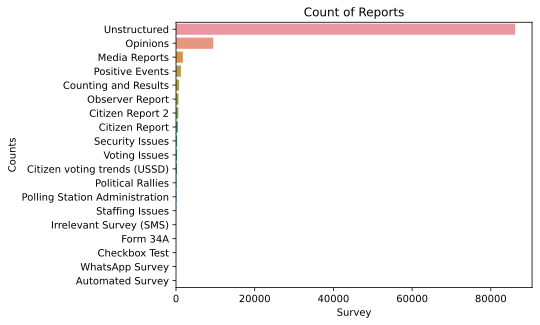

In [7]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = ushahidi_df.groupby("Survey").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='Survey')
plt.xlabel('Survey')
plt.ylabel('Counts')
plt.title('Count of Reports')
plt.show()

In [8]:
ushahidi_df['Post Date (UTC)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 102387 entries, 0 to 102386
Series name: Post Date (UTC)
Non-Null Count   Dtype 
--------------   ----- 
102386 non-null  object
dtypes: object(1)
memory usage: 800.0+ KB


In [9]:
ushahidi_df['Post Date (UTC)'] = pd.to_datetime(ushahidi_df["Post Date (UTC)"])
ushahidi_df['Created (UTC)'] = pd.to_datetime(ushahidi_df["Created (UTC)"])

In [10]:
# Util function to create column that indicates whether an election report has been labelled or not
def create_label_name(row):
    type = "Unlabelled"
    if row["Survey"] != "Unstructured":
        type = "Labelled"
    return type

In [11]:
ushahidi_df['type'] = ushahidi_df.apply(lambda row: create_label_name(row), axis=1)

In [12]:
# Filter the DataFrame based on the target date
target_date = pd.to_datetime('2022-09-30')
filtered_df = ushahidi_df[ushahidi_df['Post Date (UTC)'] <= target_date]

In [52]:
# Key dates of interest
election_date = pd.to_datetime('2022-08-09')
results_date = pd.to_datetime('2022-08-15')
court_date = pd.to_datetime('2022-09-13')

In [53]:
sns.set_theme()


<Figure size 1050x427 with 0 Axes>

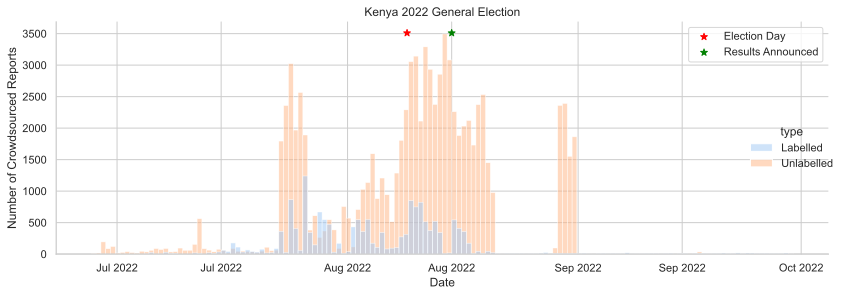

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Set style for scientific publications
sns.set(style='whitegrid', font_scale=1.0)  # Reduced font scale

# Create the plot with a white background
plt.figure(figsize=(10.5, 4.27), facecolor='white')  # Increased width to make it wider and added white background

g = sns.displot(filtered_df, x="Post Date (UTC)", hue="type", fill=True, height=4.27, aspect=10.5 / 4.27, palette='pastel')  # Adjusted height and aspect, and changed color palette

# Mark key events with smaller asterisks and labels
ax = g.ax  # Get the axis object
ax.scatter(election_date, 3510, marker='*', s=50, color='red', label='Election Day')  # Adjusted marker size and color
ax.scatter(results_date, 3510, marker='*', s=50, color='green', label='Results Announced')  # Adjusted marker size and color

# Set axis labels and title
plt.xlabel("Date")
plt.ylabel("Number of Crowdsourced Reports")
plt.title("Kenya 2022 General Election")

# Format x-axis date labels to display month name and year
date_format = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_format)



# Remove right and top spines for a cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [58]:
# Filter only labelled posts
labelled_df = ushahidi_df[(ushahidi_df["Survey"] != "Unstructured") & (ushahidi_df["Post Status"] != 'archived')]
labelled_df.shape

(14506, 245)

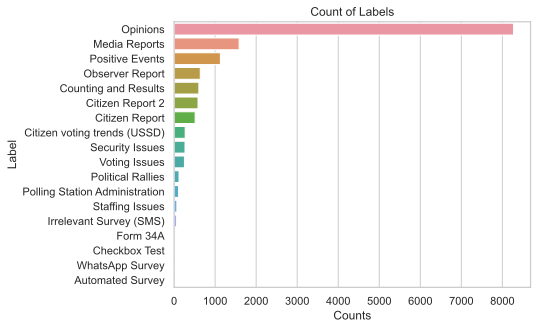

In [59]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = labelled_df.groupby("Survey").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='Survey')
plt.xlabel('Counts')
plt.ylabel('Label')
plt.title('Count of Labels')
plt.show()

In [60]:
# Get the label counts
grouped_counts.sort_values(["Counts"], ascending=False)

Survey  Counts
10                        Opinions    8272
8                    Media Reports    1585
13                 Positive Events    1128
9                  Observer Report     638
5             Counting and Results     604
3                 Citizen Report 2     583
2                   Citizen Report     513
4     Citizen voting trends (USSD)     270
14                 Security Issues     266
16                   Voting Issues     252
11               Political Rallies     120
12  Polling Station Administration     109
15                 Staffing Issues      68
7          Irrelevant Survey (SMS)      61
6                         Form 34A      24
1                    Checkbox Test       6
17                 WhatsApp Survey       5
0                 Automated Survey       1

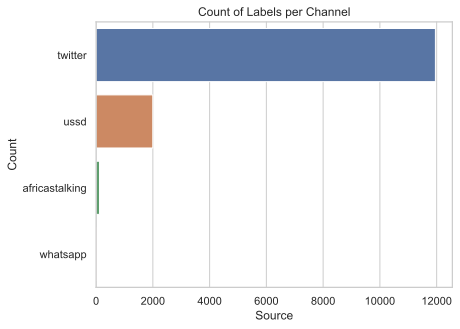

In [61]:
grouped_counts = labelled_df.groupby("Source").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Count of Labels per Channel')
plt.show()

In [85]:
# What if I create a function that takes a list of duplicated columns then for each column, finds the columns related to it and creates a new column with the cleaned values
# Dictionary to contain column name as key and the new column name to create 
# dp prefix before column name is used as shorthand for deduplicated
duplicated_cols_to_be_cleaned = { 
    "Title":"dp_title",
    "Description":"dp_description",
    "Location.lat": "dp_location_lat", 
    "Location.lon": "dp_location_long",
    "Nature incident":"dp_nature_of_this_incident",
    "Verification Status":"dp_verificiation_status",
    "Media Source":"dp_media_source",
    "Translation Status": "dp_translation_status",
    "Description Translation": "dp_description_translation"
}

def deduplicate_cols(dp_dict:dict, df:pd.DataFrame):
    def clean_row(row, dup_cols):
        val = np.nan
        for col in dup_cols:
            if pd.isnull(row[col]) != True:
                val = row[col]
        return val 

    for duplicted_col_name in dp_dict.keys():
        # Get all the list of columns that match the duplicated column name 
        dup_cols = df.columns[df.columns.str.contains(pat = duplicted_col_name)]
        # Create a new column that deduplicates the columns
        df[dp_dict[duplicted_col_name]] = df.apply(lambda row: clean_row(row, dup_cols), axis=1)
    
    return df


In [26]:
labelled_df = deduplicate_cols(duplicated_cols_to_be_cleaned, labelled_df)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_56595/3993446730.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dp_dict[duplicted_col_name]] = df.apply(lambda row: clean_row(row, dup_cols), axis=1)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_56595/3993446730.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dp_dict[duplicted_col_name]] = df.apply(lambda row: clean_row(row, dup_cols), axis=1)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_56595/3993446730.

In [27]:
deduplicated_cols = list(duplicated_cols_to_be_cleaned.values())
labelled_df[deduplicated_cols].sample(10)

dp_title  \
695     IEBC in partnership with DMF-Kenya is carrying out voter education to ensure that PWDs are included and fully participate in the General elections.   
18899                                                                                                                                       (USSD Feedback)   
101219                                                                                                  LIVE STREAM: Kenya's 2022 General Election Coverage   
61433                                                                                                                            August 9 General Election.   
55161                                                                                                                                 Conversation on Peace   
6696                                                                                                     Counting and tallying of votes is taking too long.   
2745                                                                                                       RMS Should Have Been Doing Their Own Tallying...   
7574                                                                                                                 STATEHOUSE MUST LET IEBC DO THEIR WORK   
79542                                                                               THE DIE IS CAST,FINAL RESULT SEEMS TO BE 52% FOR RUTO AND 47% FOR RAILA   
47846                                                                                                                                       (USSD Feedback)   

                                                                                                                                                                                                                                                                                                                                    dp_description  \
695                                                                                IEBC in partnership with DMF-Kenya is carrying out voter education to ensure that PWDs are included and fully participate in the #GE2022. \nThe organization has transcribed voter education materials into BRAILLE and other forms which are friendly to PWDs.   
18899                                                                                                                                                                                                                                                                                                                              (USSD Feedback)   
101219                                                                                                                                                                                                                                      LIVE STREAM: Kenya's 2022 General Election Coverage, Tallying, and Provisional Results \n#Decision2022   
61433                                                                                                                                                                                                     Let us allow Kenyans to exercise their democratic right by voting freely for their candidate of choice on the August 9 General Election.   
55161                                                                                                          Conversation on peace during elections, how IEBC is prepared, and also security agencies' preparedness for the coming elections \n\n Happening at All Saints A.C.K Church in Naivasha\n#ElectionsBilaNoma (#ElectionWithNoViolence)   
6696                                                                                                                                                                                              Why would counting and tallying 13 million votes take more than 3 days in a situation where the IEBC is equiped with enough staff and resources?   
274

In [28]:
cols_of_interest = ["Post ID", "Survey", "Post Status", "Created (UTC)", "Updated (UTC)", "Post Date (UTC)", 
                    "Source", "Data Source ID", "Source"]

cols_of_interest = cols_of_interest +  deduplicated_cols

In [29]:
labelled_df[cols_of_interest].head()

Post ID                          Survey Post Status       Created (UTC)  \
0        NaN                             NaN         NaN                 NaT   
1        4.0  Polling Station Administration   published 2022-06-27 13:47:09   
631    634.0                        Opinions   published 2022-07-05 05:09:03   
634    637.0                        Opinions   published 2022-07-05 05:17:07   
635    638.0                        Opinions   published 2022-07-05 05:24:03   

           Updated (UTC)     Post Date (UTC)   Source         Data Source ID  \
0                    NaN                 NaT      NaN                    NaN   
1    2022-08-02 21:37:34 2022-06-27 13:45:01  twitter  1541417316273246208.0   
631  2022-08-03 10:04:14 2022-07-05 05:08:29  twitter  1544186432301957120.0   
634  2022-08-05 06:25:38 2022-07-05 05:16:28  twitter  1544188438773207040.0   
635  2022-08-05 06:27:07 2022-07-05 05:23:19  twitter  1544190162770567168.0   

      Source  \
0        NaN   
1    twitter   
631  twitter   
634  twitter   
635  twitter   

                                                                                                        dp_title  \
0                                                                                                            NaN   
1    Nominated Senator Beth Mugo requests IEBC to consider those with fingerprint insensitivity in the August 9.   
631                                                               YOUTH PARTICIPATION IN THE GENERAL ELECTIONS .   
634                                                                             VOTER EDUCATION AMONG THE YOUTH.   
635                                                        PARTICIPATION OF THE YOUTH IN THE GENERAL ELECTIONS .   

                                                                                                                                                                  dp_description  \
0                                                                                                                                                                            NaN   
1                                                                                                             https://twitter.com/1146124540055052289/status/1541417316273246208   
631  Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.   
634     It is important for youths to understand the election and voting processes, their role in the processes and how to ensure that peace is maintained even after elections.   
635  Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.   

     dp_location_lat  dp_location_long  dp_nature_of_this_incident  \
0                NaN               NaN                         NaN   
1          -1.303169         36.826061                         NaN   
631        -1.283253         36.817245                         NaN   
634        -1.303264         36.826384                         NaN   
635        -1.303264         36.826384                         NaN   

                              dp_verificiation_status  \
0                                                 NaN   
1    Verification, Verified, No need for verification   
631            Verification, No need for verification   
634                            Verification, Verified   
635            Verification, No need for verification   

                  dp_media_source                 dp_translation_status  \
0                             NaN                                   NaN   
1                             NaN  Translation, No need for translation   
631  Media Stream Source, Twitter  Translation, No need for translation   
634  Media Stream Source, Twitter  Translation, No need for translation   
635  Media Stream Source, Twi

In [62]:
uchaguzi_df = pd.read_csv("data/Uchaguzi August 2017.csv")
uchaguzi_df.shape

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_497/2918578088.py:1: DtypeWarning: Columns (4,9,10,11,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,52,53,54,56,57,58,59,60,61,62,64,65,66,67,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,90,91,92,94,95,96,97,98,99,100,101,103,104,105,106,107,108,111,112,113,115,116,117,118,119,120,121,122,124,125,126,127,128,129,132,133,134,135,136,138,139,140,141,142,143,145,146,147,148,149,151,152,153,154,155,158,159,160,161,162,163,164,165,166,167,168,170,172,173,174,175,176,179,180,181,182,183,184,185,186,187,188,189,191,192,193,194,199,200,201,202,203,205,206,207,209,210,211,213,214,215,217,218,219,220,221,223,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  uchaguzi_df = pd.read_csv("data/Uchaguzi August 2017.csv")


(49122, 230)

In [63]:
uchaguzi_rerun_df = pd.read_csv("data/Uchaguzi October 2017.csv")
uchaguzi_rerun_df.shape

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_497/2824090327.py:1: DtypeWarning: Columns (16,25,43,44,102,103,113,119,121,123,126,135,145,146,148,157,163,199) have mixed types. Specify dtype option on import or set low_memory=False.
  uchaguzi_rerun_df = pd.read_csv("data/Uchaguzi October 2017.csv")


(7617, 204)

In [64]:
# Drop all columns that are fully null
print(f"Before dropping columns that are null : {uchaguzi_df.shape}")
uchaguzi_df = uchaguzi_df.dropna(axis=1, how='all')
print(f"After dropping columns that are null : {uchaguzi_df.shape}")

Before dropping columns that are null : (49122, 230)
After dropping columns that are null : (49122, 213)


In [82]:
# Drop all columns that are fully null
print(f"Before dropping columns that are null : {uchaguzi_rerun_df.shape}")
uchaguzi_rerun_df = uchaguzi_rerun_df.dropna(axis=1, how='all')
print(f"After dropping columns that are null : {uchaguzi_rerun_df.shape}")

Before dropping columns that are null : (7617, 161)
After dropping columns that are null : (7617, 161)


In [66]:
uchaguzi_df['Post Status'].unique()

array([nan, 'archived', 'draft', 'published'], dtype=object)

In [67]:
# Check the number of archived/published posts - assuming that published posts have actually been verified by the publishing team
uchaguzi_df[(uchaguzi_df['Post Status'] == 'archived') & (uchaguzi_df['Survey'] != 'Unstructured')]

Post ID                          Survey Post Status  \
53        53.0                 Security Issues    archived   
95        96.0            Counting and Results    archived   
97       100.0                 Security Issues    archived   
182      197.0  Polling Station Administration    archived   
202      219.0                   Voting Issues    archived   
...        ...                             ...         ...   
10631  10867.0            Counting and Results    archived   
10838  11074.0                 Security Issues    archived   
10984  11220.0                 Security Issues    archived   
12796  13034.0                 Security Issues    archived   
16864  17106.0                           Other    archived   

             Created (UTC)        Updated (UTC)      Post Date (UTC)  \
53     2017-08-05 04:22:06  2017-08-08 21:20:52  2017-08-05 04:22:06   
95     2017-08-05 07:15:55  2017-08-08 21:20:54  2017-08-05 07:15:55   
97     2017-08-05 07:59:12  2017-08-07 12:53:30  2017-08-05 07:59:12   
182    2017-08-05 09:53:46  2017-08-06 07:31:18  2017-08-05 09:53:46   
202    2017-08-05 09:56:28  2017-08-07 07:06:25  2017-08-05 09:56:28   
...                    ...                  ...                  ...   
10631  2017-08-11 13:20:52  2017-08-11 19:47:09  2017-08-11 13:20:52   
10838  2017-08-11 17:36:22  2017-08-11 22:14:08  2017-08-11 17:36:22   
10984  2017-08-11 19:41:12  2017-08-11 20:25:43  2017-08-11 19:41:12   
12796  2017-08-14 07:43:39  2017-08-15 07:10:51  2017-08-14 07:43:39   
16864  2017-08-28 17:40:15  2017-10-27 17:39:40  2017-08-28 17:40:15   

       Contact ID       Contact Unstructured Description  \
53          613.0  254705108692                      NaN   
95          642.0  254702708790                      NaN   
97          645.0  254704880258                      NaN   
182         718.0  254703797990                      NaN   
202         733.0  254791408985                      NaN   
...           ...           ...                      ...   
10631       864.0  254727566913                      NaN   
10838         NaN           NaN                      NaN   
10984      2600.0  254724280038                      NaN   
12796      3735.0  254704806745                      NaN   
16864      6659.0  254707547216                      NaN   

                                                                                                                                          Description  \
53                                                                                                                                                NaN   
95                                                                                  peace before and after elections, that is a duty for every kenyan   
97                                                                                                                                                NaN   
182                                                                                                                                               NaN   
202                                                                                                                                               NaN   
...                                                                                                                                               ...   
10631  IEBC CHAIRMAN Wafula Chebukati says electoral systems, networks and servers are safe and secure; Msando murder will not affect their delivery.   
10838                                                                                                                                             NaN   
10984                                                                                                                                             NaN   
12796                                                                                                                                             

In [86]:
uchaguzi_df = deduplicate_cols(duplicated_cols_to_be_cleaned, uchaguzi_df)

In [87]:
uchaguzi_rerun_df = deduplicate_cols(duplicated_cols_to_be_cleaned, uchaguzi_rerun_df)

In [97]:
uchaguzi_combined = pd.concat([uchaguzi_df,uchaguzi_rerun_df])

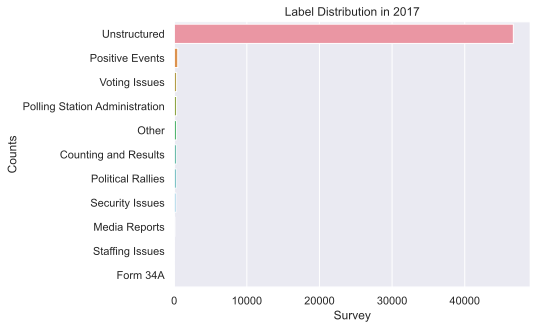

In [ ]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = uchaguzi_df.groupby("Survey").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='Survey')
plt.xlabel('Survey')
plt.ylabel('Counts')
plt.title('Label Distribution in 2017')
plt.show()

In [69]:
uchaguzi_df.groupby("Survey").size()

Survey
Counting and Results                293
Form 34A                             15
Media Reports                        98
Other                               312
Political Rallies                   281
Polling Station Administration      330
Positive Events                     496
Security Issues                     238
Staffing Issues                      33
Unstructured                      46693
Voting Issues                       332
dtype: int64

In [70]:
uchaguzi_rerun_df.groupby('Survey').size()

Survey
Counting and Results                83
Media Reports                       28
Other                              232
Political Rallies                    6
Polling Station Administration      97
Positive Events                    181
Security Issues                    120
Staffing Issues                      3
Unstructured                      6835
Voting Issues                       31
dtype: int64

In [98]:
uchaguzi_combined['Post Date (UTC)'] = pd.to_datetime(uchaguzi_combined["Post Date (UTC)"])

In [99]:
uchaguzi_combined['Type'] = uchaguzi_combined.apply(lambda row: create_label_name(row), axis=1)

In [100]:
# Key dates of interest
election_date_2017 = pd.to_datetime('2017-08-09')
results_date_2017 = pd.to_datetime('2022-08-15')

In [102]:
uchaguzi_combined.shape

(56739, 238)

In [105]:
uchaguzi_combined['Post Date (UTC)'].info()

<class 'pandas.core.series.Series'>
Int64Index: 56739 entries, 0 to 7616
Series name: Post Date (UTC)
Non-Null Count  Dtype         
--------------  -----         
56737 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 886.5 KB


In [106]:
uchaguzi_combined = uchaguzi_combined.dropna(subset=['Post Date (UTC)'])

<Figure size 1050x427 with 0 Axes>

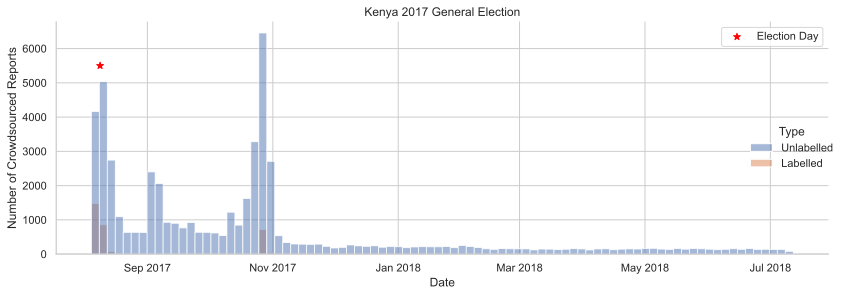

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Set style for scientific publications
sns.set(style='whitegrid', font_scale=1.0)  # Reduced font scale

# Create the plot with a white background
plt.figure(figsize=(10.5, 4.27), facecolor='white')  # Increased width to make it wider and added white background

g = sns.displot(uchaguzi_combined, x="Post Date (UTC)", hue="Type", fill=True, height=4.27, aspect=10.5 / 4.27)  # Adjusted height and aspect, and changed color palette

# Mark key events with smaller asterisks and labels
ax = g.ax  # Get the axis object
ax.scatter(election_date_2017, 5500, marker='*', s=50, color='red', label='Election Day')  # Adjusted marker size and color
ax.scatter(results_date, 3510, marker='*', s=50, color='green', label='Results Announced')  # Adjusted marker size and color

# Set axis labels and title
plt.xlabel("Date")
plt.ylabel("Number of Crowdsourced Reports")
plt.title("Kenya 2017 General Election")

# Format x-axis date labels to display month name and year
date_format = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_format)


# Remove right and top spines for a cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [45]:
uchaguzi_labelled_df = uchaguzi_df[(uchaguzi_df['Survey'] != 'Unstructured') & (uchaguzi_df['Post Status'] != 'archived')]
uchaguzi_labelled_df.shape

(2133, 223)

In [46]:
uchaguzi_rerun_labelled_df = uchaguzi_rerun_df[(uchaguzi_rerun_df['Survey'] != 'Unstructured') & (uchaguzi_rerun_df['Post Status'] != 'archived')]
uchaguzi_rerun_labelled_df.shape

(545, 170)

In [47]:
combined_2017_data = pd.concat([uchaguzi_labelled_df, uchaguzi_rerun_labelled_df])
combined_2017_data.shape

(2678, 237)

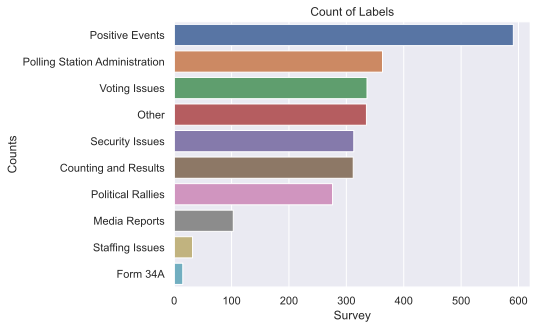

In [48]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = combined_2017_data.groupby("Survey").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='Survey')
plt.xlabel('Survey')
plt.ylabel('Counts')
plt.title('Count of Labels')
plt.show()

In [49]:
list(combined_2017_data.columns)

['Post ID',
 'Survey',
 'Post Status',
 'Created (UTC)',
 'Updated (UTC)',
 'Post Date (UTC)',
 'Contact ID',
 'Contact',
 'Unstructured Description',
 'Description',
 'Title',
 'Incident Date',
 'Location.lat',
 'Location.lon',
 'Refine Location Name',
 'Nature of this incident',
 'Image of incident',
 'Video Link',
 'Media Link',
 'Translation Status',
 'Description Translation',
 'Geolocation Status',
 'Notes',
 'Verification Status',
 'Action Taken to Verify',
 'Notes.1',
 'Escalation Status',
 'Action taken',
 'Title.1',
 'Description.1',
 'Incident date',
 'Location.lat.1',
 'Location.lon.1',
 'Refine location name',
 'Nature of this incident.1',
 'Image/Picture of incident',
 'Translation Status.1',
 'Description Translation.1',
 'Geolocation Status.1',
 'Notes.2',
 'Verification Status.1',
 'Action taken to verify',
 'Notes.3',
 'Escalation Status.1',
 'Action taken.1',
 'Title.2',
 'Description.2',
 'Incident Date.1',
 'Location.lat.2',
 'Location.lon.2',
 'Refine Location Nam

In [50]:
combined_2017_data[["dp_description","Survey"]][combined_2017_data.Survey == 'Positive Event'].head(20)

Empty DataFrame
Columns: [dp_description, Survey]
Index: []

In [51]:
combined_2017_data.iloc[combined_2017_data.index.get_loc(92)][['dp_nature_of_this_incident','Nature of this incident.1','Nature of the incident','Nature of this incident.2']]

dp_nature_of_this_incident                NaN
Nature of this incident.1                 NaN
Nature of the incident        Everything Fine
Nature of this incident.2                 NaN
Name: 92, dtype: object

In [52]:
combined_2017_data['Nature of the incident'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2678 entries, 0 to 7616
Series name: Nature of the incident
Non-Null Count  Dtype 
--------------  ----- 
481 non-null    object
dtypes: object(1)
memory usage: 106.4+ KB


In [53]:
cols_of_interest = ["Survey","dp_description","Source","Post ID", "Data Source ID"]

In [54]:
labels = ['Opinions', 'Political Rallies', 'Positive Events', 'Security Issues',
       'Voting Issues', 'Counting and Results', 'Staffing Issues', 'Polling Station Administration']

In [55]:
data_df = labelled_df[labelled_df['Survey'].isin(labels)]

In [56]:
data_df = data_df[cols_of_interest]

In [57]:
data_df.columns = ["label", "text", "source", "id", "data_source_id"]

In [58]:
data_df.head()

label  \
1    Polling Station Administration   
631                        Opinions   
634                        Opinions   
635                        Opinions   
646                        Opinions   

                                                                                                                                                                            text  \
1                                                                                                             https://twitter.com/1146124540055052289/status/1541417316273246208   
631  Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.   
634     It is important for youths to understand the election and voting processes, their role in the processes and how to ensure that peace is maintained even after elections.   
635  Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.   
646                                Voting is just one of the many ways young people can make their voices heard & have an impact on issues that affect them & their communities!   

      source     id         data_source_id  
1    twitter    4.0  1541417316273246208.0  
631  twitter  634.0  1544186432301957120.0  
634  twitter  637.0  1544188438773207040.0  
635  twitter  638.0  1544190162770567168.0  
646  twitter  649.0  1544219474827816960.0

In [59]:
labels = ['Opinions', 'Political Rallies', 'Positive Events', 'Security Issues',
       'Voting Issues', 'Counting and Results', 'Staffing Issues', 'Polling Station Administration']

data_df["merged_label"] = data_df['label'].replace({'Polling Station Administration':"Voting Issues",'Staffing Issues':"Voting Issues", "Voting Issues":"Voting Issues", "Opinions":"Other"})

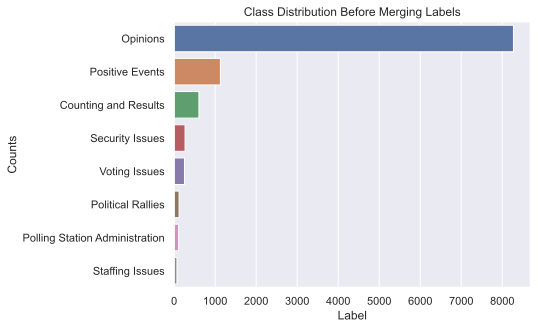

In [60]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = data_df.groupby("label").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='label')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Class Distribution Before Merging Labels')
plt.show()

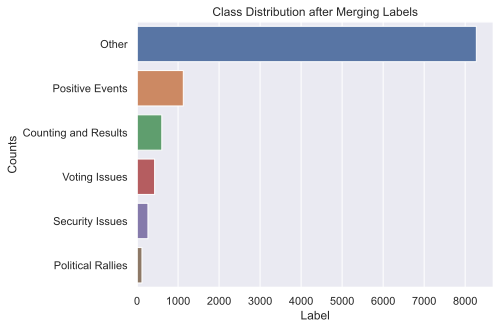

In [61]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = data_df.groupby("merged_label").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='merged_label')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Class Distribution after Merging Labels')
plt.show()

In [62]:
# Full Duplicates - tweet and label are the same
duplicates = data_df.duplicated(["text","label"])
print(f"Full duplicates: {len(duplicates[duplicates == True])}")

# Duplicate tweets that have different labels
duplicates = data_df.duplicated(["text"])
print(f"Duplicates with different labels: {len(duplicates[duplicates == True])}")

# Count the number of tweets before dropping
print(f"The number of tweets before dropping duplicates is {len(data_df)}")

# Drop the full duplicates
cleaned_df = data_df.drop_duplicates(subset=["text"])
print(f"The number of tweets after dropping duplicates is {len(cleaned_df)}")

Full duplicates: 366
Duplicates with different labels: 434
The number of tweets before dropping duplicates is 10819
The number of tweets after dropping duplicates is 10385


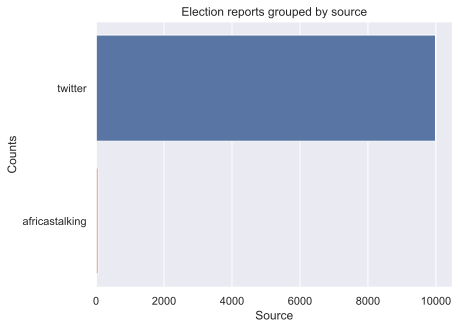

In [63]:
# Look at the source distribution of the reports
grouped_counts = cleaned_df.groupby("source").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='source')
plt.xlabel('Source')
plt.ylabel('Counts')
plt.title('Election reports grouped by source')
plt.show()

In [64]:
# Util functions for cleaning the data
def replace_newline(text):
    '''
        Replace all occurences of new line delimeter in the text with space
    '''
    cleaned_text = text.replace("\n", " ")
    return cleaned_text

# Remove unicode
def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

# Replacing URLs 
def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

# Replace user mentions e.g. @
def replaceAtUser(text):
    """ Replaces "@user" with "atUser" """
    text = re.sub('@[^\s]+','usr',text)
    return text

# Remove hashtags infront of words
def removeHashtagInFrontOfWord(text):
    """ Removes hastag in front of a word """
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def replace_numbers(text):
    cleaned_text = re.sub(r'\d+', "NUM", text)
    return cleaned_text

def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

def replaceMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

def remove_punctuation(text):
    # Remove punctuation between words
    text = re.sub(r'(\w)([^\w\s]+)(?=\w)', r'\1 \2 ', text)
    # Remove remaining punctuation
    text = re.sub(r'[^\w\s]', '', text)   
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def lower_case(text):
    # remove newline and tab characters
    text = text.replace("\n","").replace("\t","")
    # strip whitespace
    text = text.strip()
    # lowercase
    text = text.lower()
    return text

In [65]:
stoplist = stopwords.words('english')
my_stopwords = "usr url atuser st rd nd th am pm kenyadecides2022 kenyaschoice2022 kenyadecid kenyadecides kenyadecidesnum iebc num multiexclamation multiquestion multistop" # my extra stopwords
stoplist = stoplist + my_stopwords.split()
tokenizer = TweetTokenizer()

def remove_stopwords(text):
     # Tokenize the text into words
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stoplist]

    #     # Lemmatize words
#     lemmatizer = WordNetLemmatizer()
#     cleaned_text = [lemmatizer.lemmatize(word) for word in filtered_tokens]
#     stemmer = PorterStemmer() 
#     cleaned_text = [stemmer.stem(word) for word in filtered_tokens]
    
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

In [66]:
def clean_text(text):
    text = replace_newline(text)
    text = removeUnicode(text)
    text = replace_numbers(text)
    text = replaceURL(text)
    text = replaceAtUser(text)
    text = removeHashtagInFrontOfWord(text)
    text = removeEmoticons(text)
    text = replaceMultiExclamationMark(text)
    text = replaceMultiQuestionMark(text)
    text = replaceMultiStopMark(text)
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_stopwords(text)
    return text

In [67]:
sample = 'With the 2022 general elections around the corner, it is important to raise awareness on election-related SGBV& its consequences in Kenya and advocate for accountability and adopt measures to prevent&protect women &girls.'

In [68]:
clean_text(sample)

'general elections around corner important raise awareness election related sgbv consequences kenya advocate accountability adopt measures prevent protect women girls'

In [69]:
# Check cleaning of data

In [70]:
test_samples = list(data_df['text'].sample(5))
test_samples

['Prof George Wajackoyah at CUEA, demands to face DP Ruto and Raila in the Presidential Debate.',
 'In politics, TRUTH is NOT STANDARD. As to who is telling the truth between IEBC and DCI is dependent on your political leaning. \nAzimio la Umoja supporters think DCI is telling the truth. Kenya Kwanza supporters think IEBC is telling the truth.  \nVote your choice as Dp. Ruto',
 'Different Media companies are showing different candidates take the lead which has caused confusion.',
 'HOW WILL YOU MAKE SURE THAT THIS ELECTION WILL BE CONDUCTED FREE AND FAIR',
 'TO BE KENYAN IS TO … Embrace diversity. \nThe many faces and colors of our nation are what makes Kenya … Kenya!']

In [71]:
for ts in test_samples:
    print(clean_text(ts) + "\n")

prof george wajackoyah cuea demands face dp ruto raila presidential debate

politics truth standard telling truth dci dependent political leaning azimio la umoja supporters think dci telling truth kenya kwanza supporters think telling truth vote choice dp ruto

different media companies showing different candidates take lead caused confusion

make sure election conducted free fair

kenyan embrace diversity many faces colors nation makes kenya kenya



In [72]:
# Duplicate tweets that have different labels
duplicates = data_df.duplicated(["text"])
print(f"Duplicates with different labels: {len(duplicates[duplicates == True])}")

# Count the number of tweets before dropping
print(f"The number of tweets before dropping duplicates is {len(data_df)}")

# Drop the full duplicates
cleaned_df = data_df.drop_duplicates(subset=["text"])
print(f"The number of tweets after dropping duplicates is {len(cleaned_df)}")

# Count the number of tweets before dropping
print(f"The number of tweets before dropping duplicates is {len(data_df)}")

# Drop the full duplicates
cleaned_df = data_df.drop_duplicates(subset=["text"])
print(f"The number of tweets after dropping duplicates is {len(cleaned_df)}")

Duplicates with different labels: 434
The number of tweets before dropping duplicates is 10819
The number of tweets after dropping duplicates is 10385
The number of tweets before dropping duplicates is 10819
The number of tweets after dropping duplicates is 10385


In [73]:
# Apply the clean text function to the tweet column
cleaned_df["clean_text"] = cleaned_df["text"].map(clean_text)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_56595/2063305511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["clean_text"] = cleaned_df["text"].map(clean_text)


In [74]:
def calculate_length(text):
    tokens = tokenizer.tokenize(text)
    return len(tokens)

In [75]:
cleaned_df["clean_text"] = cleaned_df["clean_text"].astype(str)
cleaned_df["length"] = cleaned_df["clean_text"].map(calculate_length)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_56595/441047240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["clean_text"] = cleaned_df["clean_text"].astype(str)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_56595/441047240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["length"] = cleaned_df["clean_text"].map(calculate_length)


In [76]:
cleaned_df[["label","text","clean_text","length"]].sample(10)

label  \
73803         Opinions   
86350         Opinions   
23017         Opinions   
64824         Opinions   
64239         Opinions   
55367  Positive Events   
97460         Opinions   
85064         Opinions   
22222         Opinions   
64723         Opinions   

                                                                                                                                                                                                                                                                      text  \
73803                                                                                                                                                       Was she appointed by Chebukati or IEBC? Or did she appoint herself? Those who appointed her should recall her.   
86350                                                                                                                                                                Guys, read KPMG Report on "Ghost IEBC Officiasl" on Standard Pg 5 and Star Pg 2. You will be shocked.   
23017  Happy that IEBC made the announcement regardless. Not announcing the elections would have led to violence.\n\nCongratulations @WilliamsRuto lakini @glwajackoyah remains The 5th \n\nIn other news, isn't it funny that the 4 commissioners were appointed by Uhuru   
64824                                                                                                                                                                                                   https://twitter.com/1370311236915695619/status/1551283466259636224   
64239                In short, the Kenya Kwanza being players in this coming elections support reckless behaviour of the IEBC just transporting crucial materials in such a manner,who is fooling who? Loopholes must be sealed,we need transparency when it comes to IEBC   
55367                                       @UNDP is committed to increase inclusiveness and youth participation in election processes in the spirit of Leave No One Behind\n#LetPeaceWin #ElectionsBilaNoma @EUinKenya @SwedeninKE @NCIC_Kenya @irck_info @PeaceNet_Kenya   
97460                                                                                                                                                                                                                    After  this elections, iebc should  be disbanded.   
85064                                                                                                                              Our differences are not intended to separate or to alienate us. We are different precisely in order to realize our need of one another.   
22222                                                                                                                            Åctivë\n@TitoKyp\n·\nFollow\nRuto underway to Bomas Kenya to be announced the 5th president of kenya\nNo Re run| IEBC| Kondele | Atwoli |   
64723                                                                                                                            @IEBCKenya to come clean on this! Voting is our constitutional rights and must be midwifed in credible transparent and verifiable manner!   

                                                                                                                                                               clean_text  \
73803                                                                                                                        appointed chebukati appoint appointed recall   
86350                                                                                                   guys read kpmg report ghost officiasl standard pg star pg shocked   
23017            happy made announcement regardless announcing elections would led violence congratulations lakini remains numth news funny commissioners appointed uhuru   
64824                                                              

In [77]:
cleaned_df["length"].idxmax()
cleaned_df.iloc[cleaned_df["length"].idxmax(), :]

label                                                                                                                               Positive Events
text              Katibu wa wizara ya usalama Karanja Kibicho amehakikishia wakenya kuwa usalama utadumishwa wakati wa uchaguzi mkuu wa Agosti tisa
source                                                                                                                                      twitter
id                                                                                                                                           3595.0
data_source_id                                                                                                                  1550060852962889728
merged_label                                                                                                                        Positive Events
clean_text        katibu wa wizara ya usalama karanja kibicho amehakikishia wakenya kuwa usalama utadumishwa wak

In [78]:
cleaned_df['clean_text'].replace('', np.nan, inplace=True)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_56595/848052644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['clean_text'].replace('', np.nan, inplace=True)


In [79]:
cleaned_df.dropna(subset=['clean_text'], inplace=True)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_56595/643976075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['clean_text'], inplace=True)


In [80]:
cleaned_df.shape

(10190, 8)

In [81]:
## Classifying 2022 informative data
cleaned_df["informative_label"] = cleaned_df['merged_label'].replace({'Other':'Non-Informative','Political Rallies':'Informative', 
                                                                        "Positive Events":'Informative', "Security Issues":'Informative', 
                                                                        'Voting Issues': 'Informative',  'Counting and Results':'Informative'})

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_56595/511412759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["informative_label"] = cleaned_df['merged_label'].replace({'Other':'Non-Informative','Political Rallies':'Informative',


In [82]:
cleaned_df['informative_label'].unique()

array(['Non-Informative', 'Informative'], dtype=object)

In [83]:
train_data, test_data = train_test_split(cleaned_df, test_size=0.20)

In [84]:
print(f"Training data shape {train_data.shape}")

print(f"Test data shape {test_data.shape}")

Training data shape (8152, 9)
Test data shape (2038, 9)


In [966]:
labeler = LabelEncoder()
train_data["target"] = labeler.fit_transform(train_data["merged_label"])
test_data["target"] = labeler.transform(test_data["merged_label"])

In [967]:
mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(mapping)

{'Counting and Results': 0, 'Other': 1, 'Political Rallies': 2, 'Positive Events': 3, 'Security Issues': 4, 'Voting Issues': 5}


In [968]:
labeler = LabelEncoder()
train_data["informative_target"] = labeler.fit_transform(train_data["informative_label"])
test_data["informative_target"] = labeler.transform(test_data["informative_label"])

informative_mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(informative_mapping)

{'Informative': 0, 'Non-Informative': 1}


In [969]:
def evaluate_model(
    train_df : pd.DataFrame,
    test_df  : pd.DataFrame,
    mapping  : dict,
    pipe     : Pipeline,
) -> None:

    model = pipe.fit(train_df["clean_text"], 
                     train_df["target"])

    # print("Model evaluation on train data")
    # train_pred  = model.predict(train_df["text"])
    # print(classification_report(train_data["target"],
    #                             train_pred, 
    #                             target_names=mapping))

    pred  = model.predict(test_df["clean_text"])

    print("Model evaluation on test data")
    print(classification_report(test_df["target"],
                                pred, 
                                target_names=mapping))
    
    print("weighted f1 score:", f1_score(test_df["target"], 
                                     pred, 
                                     average="weighted"))
    print("balanced_accuracy", balanced_accuracy_score(test_df["target"], 
                                                       pred))
    

In [970]:
def evaluate_informative_model(
    train_df : pd.DataFrame,
    test_df  : pd.DataFrame,
    mapping  : dict,
    pipe     : Pipeline,
) -> None:

    model = pipe.fit(train_df["clean_text"], 
                     train_df["informative_target"])

    # print("Model evaluation on train data")
    # train_pred  = model.predict(train_df["text"])
    # print(classification_report(train_data["target"],
    #                             train_pred, 
    #                             target_names=mapping))

    pred  = model.predict(test_df["clean_text"])

    print("Model evaluation on test data")
    print(classification_report(test_df["informative_target"],
                                pred, 
                                target_names=mapping))
    
    print("weighted f1 score:", f1_score(test_df["informative_target"], 
                                     pred, 
                                     average="weighted"))
    print("balanced_accuracy", balanced_accuracy_score(test_df["informative_target"], 
                                                       pred))
    

## Informative vs non-informative

In [972]:
# Perform 5-fold cross-validation
scores = cross_val_score(lsvc_pipe, train_data['clean_text'], train_data['informative_target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)
evaluate_informative_model(train_data, test_data, informative_mapping, lsvc_pipe)

Average F1 Score: 0.6624669688148312
Individual F1 Scores: [0.65696989 0.671915   0.66076906 0.65698653 0.66569436]
Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.43      0.63      0.51       453
Non-Informative       0.88      0.76      0.81      1585

       accuracy                           0.73      2038
      macro avg       0.65      0.69      0.66      2038
   weighted avg       0.78      0.73      0.75      2038

weighted f1 score: 0.7461413064304788
balanced_accuracy 0.6940648045626423


In [973]:
# Perform 5-fold cross-validation
scores = cross_val_score(nb_pipe, train_data['clean_text'], train_data['informative_target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)
evaluate_informative_model(train_data, test_data, informative_mapping, nb_pipe)

Average F1 Score: 0.6595104049461803
Individual F1 Scores: [0.66773619 0.6643811  0.65556337 0.64161496 0.66825642]
Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.41      0.65      0.51       453
Non-Informative       0.88      0.73      0.80      1585

       accuracy                           0.72      2038
      macro avg       0.65      0.69      0.65      2038
   weighted avg       0.78      0.72      0.74      2038

weighted f1 score: 0.7355032437926146
balanced_accuracy 0.693903245799124


In [974]:
# Perform 5-fold cross-validation
scores = cross_val_score(lr_pipe, train_data['clean_text'], train_data['informative_target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)
evaluate_informative_model(train_data, test_data, informative_mapping, lr_pipe)

Average F1 Score: 0.6620593032379171
Individual F1 Scores: [0.66138089 0.66864873 0.65462048 0.65678997 0.66885645]
Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.43      0.58      0.50       453
Non-Informative       0.87      0.78      0.82      1585

       accuracy                           0.74      2038
      macro avg       0.65      0.68      0.66      2038
   weighted avg       0.77      0.74      0.75      2038

weighted f1 score: 0.7485202803650279
balanced_accuracy 0.6817689291857298


In [396]:
from functools import partial

evaluate_pipeline = partial(evaluate_model,
                            train_data,
                            test_data,
                            mapping)

In [397]:
lsvc_pipe  = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                    #  ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',  LinearSVC(class_weight='balanced',
                                            random_state=50,C=0.1))])

# Perform 5-fold cross-validation
scores = cross_val_score(lsvc_pipe, train_data['clean_text'], train_data['target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.43350620603443224
Individual F1 Scores: [0.41397343 0.43613075 0.41883175 0.44767477 0.45092032]


In [398]:
evaluate_model(train_data, test_data, mapping, lsvc_pipe)

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.40      0.44      0.42       126
               Other       0.85      0.87      0.86      1554
   Political Rallies       0.17      0.11      0.13        19
     Positive Events       0.53      0.43      0.47       204
     Security Issues       0.44      0.38      0.41        52
       Voting Issues       0.48      0.53      0.51        83

            accuracy                           0.76      2038
           macro avg       0.48      0.46      0.47      2038
        weighted avg       0.76      0.76      0.76      2038

weighted f1 score: 0.7610321498762023
balanced_accuracy 0.4587244864250721


In [399]:
nb_pipe  = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   MultinomialNB())])

# Perform 5-fold cross-validation
scores = cross_val_score(nb_pipe, train_data['clean_text'], train_data['target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.3966062786236101
Individual F1 Scores: [0.3916683  0.40347041 0.39414529 0.3863654  0.40738199]


In [400]:
evaluate_model(train_data, test_data, mapping, nb_pipe)

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.26      0.60      0.36       126
               Other       0.89      0.59      0.71      1554
   Political Rallies       0.14      0.37      0.20        19
     Positive Events       0.36      0.63      0.46       204
     Security Issues       0.24      0.54      0.33        52
       Voting Issues       0.25      0.57      0.35        83

            accuracy                           0.59      2038
           macro avg       0.36      0.55      0.40      2038
        weighted avg       0.75      0.59      0.63      2038

weighted f1 score: 0.6317921622347938
balanced_accuracy 0.5492579637596237


In [401]:
lr_pipe  = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   LogisticRegression(max_iter=1000))])

# Perform 5-fold cross-validation
scores = cross_val_score(lr_pipe, train_data['clean_text'], train_data['target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.42406384079000475
Individual F1 Scores: [0.4068565  0.43672742 0.4128001  0.42807543 0.43585976]


In [402]:
evaluate_model(train_data, test_data, mapping, lr_pipe)

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.32      0.48      0.38       126
               Other       0.86      0.77      0.81      1554
   Political Rallies       0.20      0.16      0.18        19
     Positive Events       0.42      0.58      0.49       204
     Security Issues       0.39      0.46      0.42        52
       Voting Issues       0.35      0.49      0.41        83

            accuracy                           0.71      2038
           macro avg       0.42      0.49      0.45      2038
        weighted avg       0.75      0.71      0.72      2038

weighted f1 score: 0.7212006174079287
balanced_accuracy 0.48907336952396446


In [176]:
#Util function to plot confusion matrix
def plot_cm(labels, predictions, class_labels):
    # predictions has values in [0,1]
    cm = confusion_matrix(labels, predictions)
    # Change figure size and increase dpi for better resolution
    plt.figure(figsize=(8,6), dpi=100)
    # Scale up the size of all text
    sns.set(font_scale = 1.1)
    # Plot Confusion Matrix using Seaborn heatmap()
    # Parameters:
    # first param - confusion matrix in array format   
    # annot = True: show the numbers in each heatmap cell
    # fmt = 'd': show numbers as integers. 
    ax = sns.heatmap(cm, annot=True, fmt='d', )
    # set x-axis label and ticks. 

  # Set x-axis label and ticks
    ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
    ax.set_xticklabels(class_labels, rotation=45, ha='right')

    # Set y-axis label and ticks
    ax.set_ylabel("Gold Label", fontsize=14, labelpad=20)
    ax.set_yticklabels(class_labels, rotation=45, ha='right')

    # set plot title
    ax.set_title("Confusion Matrix", fontsize=14, pad=20)

    plt.show()

In [404]:
evaluate_pipeline(lsvc_pipe)

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.40      0.44      0.42       126
               Other       0.85      0.87      0.86      1554
   Political Rallies       0.17      0.11      0.13        19
     Positive Events       0.53      0.43      0.47       204
     Security Issues       0.44      0.38      0.41        52
       Voting Issues       0.48      0.53      0.51        83

            accuracy                           0.76      2038
           macro avg       0.48      0.46      0.47      2038
        weighted avg       0.76      0.76      0.76      2038

weighted f1 score: 0.7610321498762023
balanced_accuracy 0.4587244864250721


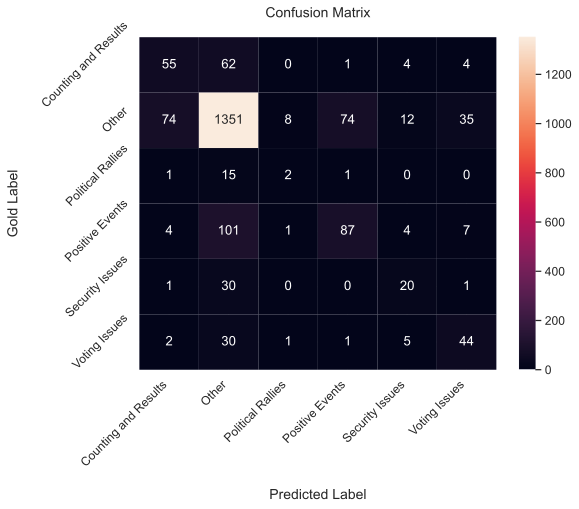

In [405]:
y_pred = lsvc_pipe.predict(test_data["clean_text"])
plot_cm(test_data['target'], y_pred, list(mapping.keys()))

In [410]:
from sklearn.preprocessing import label_binarize
import numpy as np

# get the number of classes
n_classes = len(train_data["target"].unique())

# classes = [0,1,2,3]
classes   = np.sort(train_data["target"].unique())

# relabel the test set
y_true = label_binarize(test_data["target"], 
                        classes=classes)

In [411]:
y_true

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]])

In [1168]:
def plot_roc(y_true, y_pred, mapping):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC curves for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='{0} (area = {1:0.2f})'
                    ''.format(mapping[i], roc_auc[i]))

    # Add diagonal line for reference
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

    # Set plot properties
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [413]:
y_pred_proba = lsvc_pipe.decision_function(test_data["clean_text"])

In [586]:
idx_to_class = {value: key for key, value in mapping.items()}
idx_to_class

{0: 'Counting and Results',
 1: 'Other',
 2: 'Political Rallies',
 3: 'Positive Events',
 4: 'Security Issues',
 5: 'Voting Issues'}

In [1155]:
plot_roc(y_true, y_pred_proba,idx_to_class)

TypeError: 'numpy.float64' object is not callable

# Uchaguzi 2017 election data

In [900]:
# Try out with 2017 data
combined_2017_data.shape

(2678, 237)

In [901]:
combined_2017_data.head()

Post ID           Survey Post Status        Created (UTC)  \
0       NaN              NaN         NaN                  NaN   
78     78.0  Positive Events       draft  2017-08-05 04:59:26   
86     86.0  Positive Events       draft  2017-08-05 05:37:32   
87     87.0            Other       draft  2017-08-05 05:44:50   
92     93.0  Positive Events       draft  2017-08-05 07:13:47   

          Updated (UTC)      Post Date (UTC)  Contact ID       Contact  \
0                   NaN                  NaT         NaN           NaN   
78  2017-08-06 13:59:48  2017-08-05 04:59:26       631.0  254723163149   
86  2017-08-06 06:31:08  2017-08-05 05:37:32         1.0  254726742902   
87  2017-08-06 11:19:55  2017-08-05 05:44:50       621.0  254740957929   
92  2017-08-06 07:32:51  2017-08-05 07:13:47       642.0  254702708790   

   Unstructured Description Description  ... Media Source.1 Incident date.3  \
0                       NaN         NaN  ...            NaN             NaN   
78                      NaN         NaN  ...            NaN             NaN   
86                      NaN         NaN  ...            NaN             NaN   
87                      NaN         NaN  ...            NaN             NaN   
92                      NaN         NaN  ...            NaN             NaN   

    Media Source.2  Media Source.3 Incident date.4 Nature of this incident.5  \
0              NaN             NaN             NaN                       NaN   
78             NaN             NaN             NaN                       NaN   
86             NaN             NaN             NaN                       NaN   
87             NaN             NaN             NaN                       NaN   
92             NaN             NaN             NaN                       NaN   

   Media Source.4 Media Source.5 Incident date.5 Media Source.6  
0             NaN            NaN             NaN            NaN  
78            NaN            NaN             NaN            NaN  
86            NaN            NaN             NaN            NaN  
87            NaN            NaN             NaN            NaN  
92            NaN            NaN             NaN            NaN  

[5 rows x 237 columns]

In [902]:
combined_2017_data = combined_2017_data[["Survey","dp_description"]]

In [903]:
combined_2017_data.head()

Survey  \
0               NaN   
78  Positive Events   
86  Positive Events   
87            Other   
92  Positive Events   

                                                                                                                                                                   dp_description  
0                                                                                                                                                                             NaN  
78                                                                                                                                           PREACHING PEACE.JOSEPH FROM KILIBOTI  
86                                                                                                                                                Sealed ballot box tampered with  
87  People have arrived at Likuyani from different places. They have come to vote but surprisingly, they have carried several personal belongings, including clothing and bedding  
92                                                                                                                                                Raila will win without a doubt!

In [904]:
combined_2017_data = combined_2017_data.dropna(how='all')
combined_2017_data.shape

(2676, 2)

In [1]:
combined_2017_data.columns

NameError: name 'combined_2017_data' is not defined

In [905]:
combined_2017_data.columns = ['label','text']

In [906]:
# Drop any duplicate reports in the dataset

In [907]:
# Full Duplicates - tweet and label are the same
duplicates = combined_2017_data.duplicated(["text","label"])
print(f"Full duplicates: {len(duplicates[duplicates == True])}")

# Duplicate tweets that have different labels
duplicates = combined_2017_data.duplicated(["text"])
print(f"Duplicates with different labels: {len(duplicates[duplicates == True])}")

# Count the number of tweets before dropping
print(f"The number of tweets before dropping duplicates is {len(combined_2017_data)}")

# Drop the full duplicates
cleaned_2017_df = combined_2017_data.drop_duplicates(subset=["text"])
print(f"The number of tweets after dropping duplicates is {len(cleaned_2017_df)}")

Full duplicates: 129
Duplicates with different labels: 172
The number of tweets before dropping duplicates is 2676
The number of tweets after dropping duplicates is 2504


In [908]:
cleaned_2017_df["text"] = cleaned_2017_df["text"].astype(str)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_9387/328499418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_2017_df["text"] = cleaned_2017_df["text"].astype(str)


In [909]:
cleaned_2017_df['clean_text'] = cleaned_2017_df["text"].apply(clean_text)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_9387/2486577341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_2017_df['clean_text'] = cleaned_2017_df["text"].apply(clean_text)


In [910]:
cleaned_2017_df.head(10)

label  \
78     Positive Events   
86     Positive Events   
87               Other   
92     Positive Events   
99               Other   
100              Other   
104  Political Rallies   
108    Security Issues   
109              Other   
126  Political Rallies   

                                                                                                                                                                                                  text  \
78                                                                                                                                                                PREACHING PEACE.JOSEPH FROM KILIBOTI   
86                                                                                                                                                                     Sealed ballot box tampered with   
87                       People have arrived at Likuyani from different places. They have come to vote but surprisingly, they have carried several personal belongings, including clothing and bedding   
92                                                                                                                                                                     Raila will win without a doubt!   
99                                                                                                                                                                  Let's come out and vote peacefully   
100                                                                                                                                                         I am Nzama, a supporter of NASA in Taveta.   
104  Tana River governorship aspirant Danson Mungatana received blessings from Tana River’s Chana Maro Council of Elders (Masesa) who promised to woo all area residents to support his political bid.   
108                                                                                                                                                         No presence of security at polling station   
109                                                                                                                                     Purchasing of National ID cards outside polling centre/station   
126                                                Raila, who was accompanied by other NASA co-principals assured the Kikuyu community that they will be more secure and happier under his presidency.   

                                                                                                                                                              clean_text  
78                                                                                                                                       preaching peace joseph kiliboti  
86                                                                                                                                            sealed ballot box tampered  
87                                        people arrived likuyani different places come vote surprisingly carried several personal belongings including clothing bedding  
92                                                                                                                                               raila win without doubt  
99                                                                                                                                              let come vote peacefully  
100                                                                                                                                          nzama supporter nasa taveta  
104  tana river governorship aspirant danson mungatana received blessings tana rivers chana maro council elders masesa promised woo area residents support political bid  
108                                                                                                                                    pres

In [911]:
cleaned_2017_df["label"].unique()

array(['Positive Events', 'Other', 'Political Rallies', 'Security Issues',
       'Polling Station Administration', 'Media Reports', 'Voting Issues',
       'Staffing Issues', 'Counting and Results', 'Form 34A'],
      dtype=object)

In [912]:
labels_2017 = ['Other', 'Political Rallies', 'Positive Events', 'Security Issues',
       'Voting Issues', 'Counting and Results', 'Staffing Issues', 'Polling Station Administration']

cleaned_2017_df = cleaned_2017_df[cleaned_2017_df['label'].isin(labels_2017)]

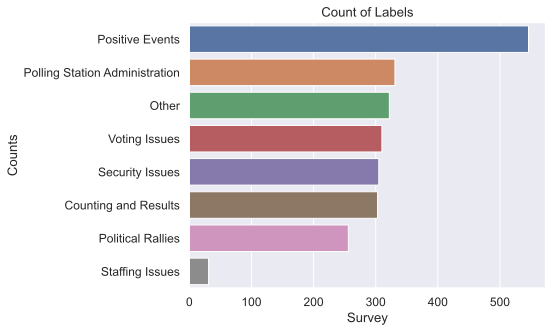

In [913]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = cleaned_2017_df.groupby("label").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='label')
plt.xlabel('Survey')
plt.ylabel('Counts')
plt.title('Count of Labels')
plt.show()

In [918]:
cleaned_2017_df["merged_label"] = cleaned_2017_df['label'].replace({'Polling Station Administration':"Voting Issues",'Staffing Issues':"Voting Issues", "Voting Issues":"Voting Issues"})

In [919]:
## Classifying 2022 informative data
cleaned_2017_df["informative_label"] = cleaned_2017_df['merged_label'].replace({'Other':'Non-Informative','Political Rallies':'Informative', 
                                                                        "Positive Events":'Informative', "Security Issues":'Informative', 
                                                                        'Voting Issues': 'Informative',  'Counting and Results':'Informative'})


In [920]:
cleaned_2017_df["informative_label"].unique()

array(['Informative', 'Non-Informative'], dtype=object)

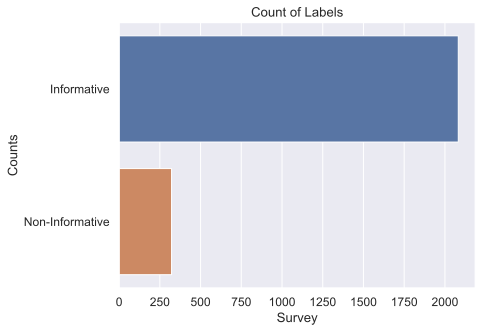

In [921]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = cleaned_2017_df.groupby("informative_label").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='informative_label')
plt.xlabel('Survey')
plt.ylabel('Counts')
plt.title('Count of Labels')
plt.show()

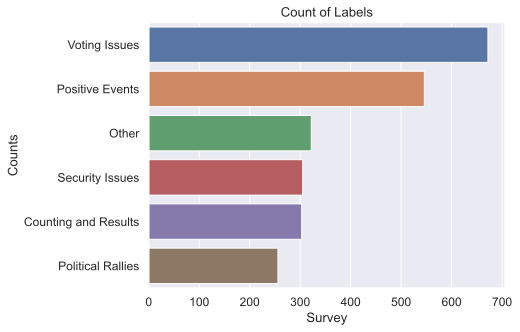

In [436]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = cleaned_2017_df.groupby("merged_label").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='merged_label')
plt.xlabel('Survey')
plt.ylabel('Counts')
plt.title('Count of Labels')
plt.show()

In [922]:
train_2017_data, test_2017_data = train_test_split(cleaned_2017_df, test_size=0.20)

In [923]:
train_2017_data.shape

(1923, 5)

In [924]:
labeler = LabelEncoder()
train_2017_data["informative_target"] = labeler.fit_transform(train_2017_data["informative_label"])
test_2017_data["informative_target"] = labeler.transform(test_2017_data["informative_label"])

informative_mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(informative_mapping)

{'Informative': 0, 'Non-Informative': 1}


In [929]:
train_2017_data.shape

(1923, 6)

In [930]:
test_2017_data.shape

(481, 6)

In [928]:
# Perform 5-fold cross-validation
scores = cross_val_score(lsvc_pipe, train_2017_data['clean_text'], train_2017_data['informative_target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)
evaluate_informative_model(train_2017_data, test_2017_data, informative_mapping, lsvc_pipe)

Average F1 Score: 0.6199168984873034
Individual F1 Scores: [0.65708864 0.59297162 0.58386059 0.62862669 0.63703694]
Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.91      0.86      0.89       414
Non-Informative       0.36      0.48      0.41        67

       accuracy                           0.81       481
      macro avg       0.64      0.67      0.65       481
   weighted avg       0.83      0.81      0.82       481

weighted f1 score: 0.8211652832830432
balanced_accuracy 0.6711731199077078


In [932]:
# Perform 5-fold cross-validation
scores = cross_val_score(nb_pipe, train_2017_data['clean_text'], train_2017_data['informative_target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)
evaluate_informative_model(train_2017_data, test_2017_data, informative_mapping, nb_pipe)

Average F1 Score: 0.6082016490527467
Individual F1 Scores: [0.62493041 0.57097023 0.58353365 0.63454218 0.62703177]
Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.92      0.82      0.86       414
Non-Informative       0.32      0.54      0.40        67

       accuracy                           0.78       481
      macro avg       0.62      0.68      0.63       481
   weighted avg       0.83      0.78      0.80       481

weighted f1 score: 0.8006790723484143
balanced_accuracy 0.6780770062729828


In [934]:
# Perform 5-fold cross-validation
scores = cross_val_score(lr_pipe, train_2017_data['clean_text'], train_2017_data['informative_target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)
evaluate_informative_model(train_2017_data, test_2017_data, informative_mapping, lr_pipe)

Average F1 Score: 0.6111745144222477
Individual F1 Scores: [0.63683714 0.57691671 0.57334053 0.64089243 0.62788577]
Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.91      0.89      0.90       414
Non-Informative       0.41      0.46      0.43        67

       accuracy                           0.83       481
      macro avg       0.66      0.68      0.67       481
   weighted avg       0.84      0.83      0.84       481

weighted f1 score: 0.8359748359748359
balanced_accuracy 0.676995457495133


In [975]:
train_data.shape

(8152, 11)

In [976]:
test_data.shape

(2038, 11)

In [978]:
train_2017_data.shape

(1923, 6)

In [988]:
cleaned_2017_df.shape

(2404, 5)

In [993]:
train_data.shape

(8152, 11)

In [995]:
combined_new = pd.concat([train_data, train_2017_data, test_2017_data ])

In [996]:
combined_new.shape

(10556, 11)

In [997]:
# Perform 5-fold cross-validation
scores = cross_val_score(lsvc_pipe, combined_new['clean_text'], combined_new['informative_target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)
evaluate_informative_model(combined_new, test_data, informative_mapping, lsvc_pipe)

Average F1 Score: 0.7407150453899174
Individual F1 Scores: [0.65706875 0.64756813 0.79187964 0.83951454 0.76754417]
Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.47      0.53      0.50       453
Non-Informative       0.86      0.83      0.85      1585

       accuracy                           0.76      2038
      macro avg       0.67      0.68      0.67      2038
   weighted avg       0.77      0.76      0.77      2038

weighted f1 score: 0.769306753610738
balanced_accuracy 0.6802006949812327


In [998]:
# Perform 5-fold cross-validation
scores = cross_val_score(lr_pipe, combined_new['clean_text'], combined_new['informative_target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)
evaluate_informative_model(combined_new, test_data, informative_mapping, lr_pipe)

Average F1 Score: 0.7379658226778008
Individual F1 Scores: [0.66184864 0.64445368 0.78476656 0.83410769 0.76465254]
Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.46      0.51      0.49       453
Non-Informative       0.86      0.83      0.84      1585

       accuracy                           0.76      2038
      macro avg       0.66      0.67      0.66      2038
   weighted avg       0.77      0.76      0.76      2038

weighted f1 score: 0.7633670075958431
balanced_accuracy 0.6708971385993133


In [999]:
# Perform 5-fold cross-validation
scores = cross_val_score(nb_pipe, combined_new['clean_text'], combined_new['informative_target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)
evaluate_informative_model(combined_new, test_data, informative_mapping, nb_pipe)

Average F1 Score: 0.7358142922122582
Individual F1 Scores: [0.6493405  0.62267223 0.78799988 0.85046549 0.76859335]
Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.51      0.51      0.51       453
Non-Informative       0.86      0.86      0.86      1585

       accuracy                           0.78      2038
      macro avg       0.68      0.68      0.68      2038
   weighted avg       0.78      0.78      0.78      2038

weighted f1 score: 0.7807536259953016
balanced_accuracy 0.6832006740900134


In [439]:
labeler = LabelEncoder()
train_2017_data["target"] = labeler.fit_transform(train_2017_data["merged_label"])
test_2017_data["target"] = labeler.transform(test_2017_data["merged_label"])

In [1075]:
lsvc_pipe  = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                    #  ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',  LinearSVC(class_weight='balanced',
                                            random_state=50,C=0.1))])

In [550]:
# Perform 5-fold cross-validation
scores = cross_val_score(lsvc_pipe, train_2017_data['clean_text'], train_2017_data['target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.6364281155975571
Individual F1 Scores: [0.60034336 0.6522946  0.63290486 0.65369703 0.64290073]


In [441]:
evaluate_model(train_2017_data, test_2017_data, mapping, lsvc_pipe)

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.61      0.60      0.60        65
               Other       0.38      0.34      0.36        58
   Political Rallies       0.79      0.90      0.84        63
     Positive Events       0.53      0.45      0.49        86
     Security Issues       0.66      0.72      0.69        75
       Voting Issues       0.64      0.66      0.65       134

            accuracy                           0.62       481
           macro avg       0.60      0.61      0.61       481
        weighted avg       0.61      0.62      0.61       481

weighted f1 score: 0.6134416779128354
balanced_accuracy 0.6145428279232394


In [1081]:
nb_pipe  = Pipeline([('vect',    CountVectorizer(max_features=10000)),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   MultinomialNB())])

In [633]:


# Perform 5-fold cross-validation
scores = cross_val_score(nb_pipe, train_2017_data['clean_text'], train_2017_data['target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.6251742044115617
Individual F1 Scores: [0.60698559 0.63167028 0.6403532  0.6249351  0.62192685]


In [443]:
evaluate_model(train_2017_data, test_2017_data, mapping, nb_pipe)

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.60      0.69      0.64        65
               Other       0.39      0.33      0.36        58
   Political Rallies       0.79      0.89      0.84        63
     Positive Events       0.51      0.40      0.44        86
     Security Issues       0.71      0.80      0.75        75
       Voting Issues       0.68      0.68      0.68       134

            accuracy                           0.63       481
           macro avg       0.61      0.63      0.62       481
        weighted avg       0.62      0.63      0.62       481

weighted f1 score: 0.6247667022182297
balanced_accuracy 0.6305393504857293


In [1082]:
lr_pipe  = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   LogisticRegression(max_iter=1000))])

In [444]:


# Perform 5-fold cross-validation
scores = cross_val_score(lr_pipe, train_2017_data['clean_text'], train_2017_data['target'], cv=5, scoring='f1_macro')

# Calculate the average F1 score
average_f1_score = scores.mean()

# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.643228626664638
Individual F1 Scores: [0.61812959 0.66271301 0.63557132 0.64984712 0.64988209]


In [445]:
evaluate_model(train_2017_data, test_2017_data, mapping, lr_pipe)

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.63      0.65      0.64        65
               Other       0.37      0.38      0.37        58
   Political Rallies       0.83      0.87      0.85        63
     Positive Events       0.46      0.40      0.42        86
     Security Issues       0.69      0.72      0.71        75
       Voting Issues       0.64      0.65      0.64       134

            accuracy                           0.61       481
           macro avg       0.60      0.61      0.61       481
        weighted avg       0.61      0.61      0.61       481

weighted f1 score: 0.608229557726416
balanced_accuracy 0.6105137720916485


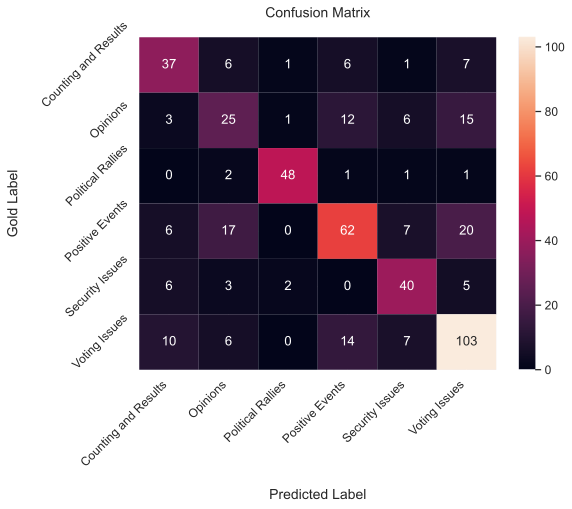

In [328]:
y_pred = lr_pipe.predict(test_2017_data["clean_text"])
plot_cm(test_2017_data['target'], y_pred, list(mapping.keys()))

## Try combining data from both elections

In [1000]:
cleaned_df.head()

label  \
631  Opinions   
634  Opinions   
646  Opinions   
647  Opinions   
653  Opinions   

                                                                                                                                                                                                                                                                       text  \
631                                                                                             Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.   
634                                                                                                It is important for youths to understand the election and voting processes, their role in the processes and how to ensure that peace is maintained even after elections.   
646                                                                                                                           Voting is just one of the many ways young people can make their voices heard & have an impact on issues that affect them & their communities!   
647                                                                                 Let's all stand out as youth to be agents of change by spreading the message of peace across all the borders within Kenya. Make an impact. There is elections and life after elections.   
653  Quite critical indeed @ItsKimaniThomas\nThe active and meaningful participation of young people in the Kenya General elections #GE2022 requires the precedent of voter education which also translates to an inclusive transparent process for peace in the elections.   

      source     id         data_source_id merged_label  \
631  twitter  634.0  1544186432301957120.0        Other   
634  twitter  637.0  1544188438773207040.0        Other   
646  twitter  649.0  1544219474827816960.0        Other   
647  twitter  650.0  1544218278519775232.0        Other   
653  twitter  656.0  1544241670384132096.0        Other   

                                                                                                                                                                                            clean_text  \
631                                                                                            elections coming youths turn vote preach peace elections never used divided selfish political interests   
634                                                                                        important youths understand election voting processes role processes ensure peace maintained even elections   
646                                                                                                               voting one many ways young people make voices heard impact issues affect communities   
647                                                                             let stand youth agents change spreading message peace across borders within kenya make impact elections life elections   
653  quite critical indeed active meaningful participation young people kenya general elections genum requires precedent voter education also translates inclusive transparent process peace elections   

     length informative_label  
631      14   Non-Informative  
634      13   Non-Informative  
646      13   Non-Informative  
647      17   Non-Informative  
653      23   Non-Informative

In [1001]:
cleaned_2017_df.shape

(2404, 5)

In [1002]:
df_2022 = cleaned_df[["text","clean_text","merged_label","label"]]
df_2017 = cleaned_2017_df[["text", "clean_text","merged_label", "label"]]

In [1003]:
combined_df = pd.concat([df_2022, df_2017])

In [1004]:
combined_df.shape

(12594, 4)

In [1005]:
combined_df.head()

text  \
631                                                                                             Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.   
634                                                                                                It is important for youths to understand the election and voting processes, their role in the processes and how to ensure that peace is maintained even after elections.   
646                                                                                                                           Voting is just one of the many ways young people can make their voices heard & have an impact on issues that affect them & their communities!   
647                                                                                 Let's all stand out as youth to be agents of change by spreading the message of peace across all the borders within Kenya. Make an impact. There is elections and life after elections.   
653  Quite critical indeed @ItsKimaniThomas\nThe active and meaningful participation of young people in the Kenya General elections #GE2022 requires the precedent of voter education which also translates to an inclusive transparent process for peace in the elections.   

                                                                                                                                                                                            clean_text  \
631                                                                                            elections coming youths turn vote preach peace elections never used divided selfish political interests   
634                                                                                        important youths understand election voting processes role processes ensure peace maintained even elections   
646                                                                                                               voting one many ways young people make voices heard impact issues affect communities   
647                                                                             let stand youth agents change spreading message peace across borders within kenya make impact elections life elections   
653  quite critical indeed active meaningful participation young people kenya general elections genum requires precedent voter education also translates inclusive transparent process peace elections   

    merged_label     label  
631        Other  Opinions  
634        Other  Opinions  
646        Other  Opinions  
647        Other  Opinions  
653        Other  Opinions

# Classifying informative vs non-informative

In [1006]:
# That's the goal for the weekend! Let's get it done
# Using the definition provided by
# Does the report contribute to better understanding the situation on the ground
# A. Related to the crisis and informative: if it contains useful information that helps understand the crisis situation.
# B. Related to the crisis, but not informative: if it refers to the crisis, but does not contain useful information that helps

In [1007]:
combined_df["merged_label"] = combined_df['label'].replace({'Polling Station Administration':"Voting Issues",'Staffing Issues':"Voting Issues", "Voting Issues":"Voting Issues", "Opinions":"Other"})

In [1008]:
combined_df.merged_label.unique()

array(['Other', 'Political Rallies', 'Positive Events', 'Security Issues',
       'Voting Issues', 'Counting and Results'], dtype=object)

In [1009]:
combined_df["informative_label"] = combined_df['merged_label'].replace({'Other':'Non-Informative','Political Rallies':'Informative', 
                                                                        "Positive Events":'Informative', "Security Issues":'Informative', 
                                                                        'Voting Issues': 'Informative',  'Counting and Results':'Informative'})

In [1010]:
combined_df['informative_label'].unique()

array(['Non-Informative', 'Informative'], dtype=object)

In [1011]:
combined_train_data, combined_test_data = train_test_split(combined_df, test_size=0.20, random_state=0)

In [1012]:
combined_train_data.shape

(10075, 5)

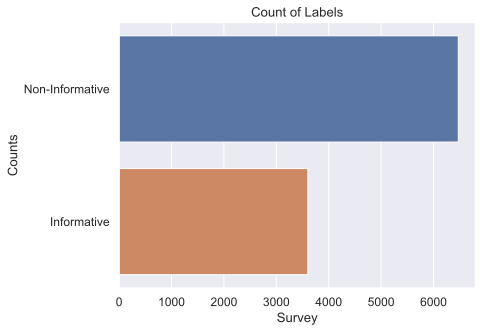

In [1013]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = combined_train_data.groupby("informative_label").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='informative_label')
plt.xlabel('Survey')
plt.ylabel('Counts')
plt.title('Count of Labels')
plt.show()

In [1014]:
combined_train_data.merged_label.unique()

array(['Voting Issues', 'Other', 'Political Rallies', 'Positive Events',
       'Security Issues', 'Counting and Results'], dtype=object)

In [1015]:
labeler = LabelEncoder()
combined_train_data["informative_target"] = labeler.fit_transform(combined_train_data["informative_label"])
combined_test_data["informative_target"] = labeler.transform(combined_test_data["informative_label"])

informative_mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(informative_mapping)

{'Informative': 0, 'Non-Informative': 1}


In [1016]:
labeler = LabelEncoder()
combined_train_data["target"] = labeler.fit_transform(combined_train_data["merged_label"])
combined_test_data["target"] = labeler.transform(combined_test_data["merged_label"])

In [1017]:
mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(mapping)

{'Counting and Results': 0, 'Other': 1, 'Political Rallies': 2, 'Positive Events': 3, 'Security Issues': 4, 'Voting Issues': 5}


In [1018]:
# SVM
scores = cross_val_score(lsvc_pipe, combined_train_data['clean_text'], combined_train_data['informative_target'], cv=5, scoring='f1_macro')
# Calculate the average F1 score
average_f1_score = scores.mean()
# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.7528614099209088
Individual F1 Scores: [0.76679966 0.75375319 0.73915193 0.74928656 0.7553157 ]


In [1026]:
combined_test_data.shape

(2519, 7)

In [1019]:
evaluate_informative_model(combined_train_data, combined_test_data, informative_mapping, lsvc_pipe)

Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.64      0.69      0.66       855
Non-Informative       0.83      0.80      0.81      1664

       accuracy                           0.76      2519
      macro avg       0.73      0.74      0.74      2519
   weighted avg       0.77      0.76      0.76      2519

weighted f1 score: 0.7624151994934051
balanced_accuracy 0.7428819444444444


In [1020]:
# Multinomial NB
informative_nb_pipe  = Pipeline([('vect',    CountVectorizer(max_features=10000)),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   MultinomialNB())])
scores = cross_val_score(informative_nb_pipe, combined_train_data['clean_text'], combined_train_data['informative_target'], cv=5, scoring='f1_macro')
# Calculate the average F1 score
average_f1_score = scores.mean()
# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.7562222860598563
Individual F1 Scores: [0.76681361 0.75642443 0.74330737 0.75580686 0.75875916]


In [1021]:
evaluate_informative_model(combined_train_data, combined_test_data, informative_mapping, informative_nb_pipe)

Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.65      0.69      0.67       855
Non-Informative       0.84      0.81      0.82      1664

       accuracy                           0.77      2519
      macro avg       0.74      0.75      0.75      2519
   weighted avg       0.77      0.77      0.77      2519

weighted f1 score: 0.7701093527216567
balanced_accuracy 0.7491920405982906


In [1022]:
# Logistic Regression
scores = cross_val_score(lr_pipe, combined_train_data['clean_text'], combined_train_data['informative_target'], cv=5, scoring='f1_macro')
# Calculate the average F1 score
average_f1_score = scores.mean()
# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.7507953283199711
Individual F1 Scores: [0.76132795 0.74960106 0.73763028 0.75239504 0.75302231]


In [1023]:
evaluate_informative_model(combined_train_data, combined_test_data, informative_mapping, lr_pipe) 

Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.64      0.67      0.66       855
Non-Informative       0.83      0.81      0.82      1664

       accuracy                           0.76      2519
      macro avg       0.74      0.74      0.74      2519
   weighted avg       0.77      0.76      0.76      2519

weighted f1 score: 0.7638136183244424
balanced_accuracy 0.7407044253261359


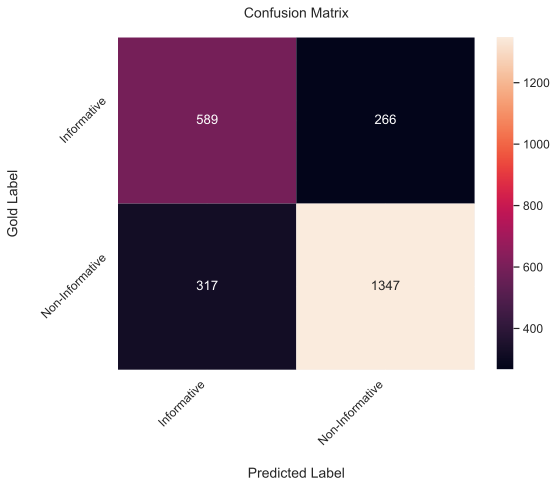

In [1027]:
y_pred_informative = informative_nb_pipe.predict(combined_test_data["clean_text"])
plot_cm(combined_test_data['informative_target'], y_pred_informative, list(informative_mapping.keys()))

In [1032]:
y_pred_prob

array([[0.06917304, 0.93082696],
       [0.22417592, 0.77582408],
       [0.1030919 , 0.8969081 ],
       ...,
       [0.78691844, 0.21308156],
       [0.05240943, 0.94759057],
       [0.12634516, 0.87365484]])

In [1160]:
# # Compute the false positive rate, true positive rate, and threshold values
# y_test = combined_test_data['informative_target']
# y_pred_prob = informative_nb_pipe.predict_proba(combined_test_data["clean_text"])[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# # Compute the area under the ROC curve
# auc = roc_auc_score(y_test, y_pred_prob)

# # Plot the ROC curve
# plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
# plt.plot([0, 1], [0, 1], 'k--', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc='lower right')
# plt.show()

In [844]:
combined_test_data['predicted_informative'] = y_pred_informative

In [846]:
test_data = combined_test_data[combined_test_data['predicted_informative'] == 0]

In [849]:
test_data['merged_label'].unique()

array(['Positive Events', 'Security Issues', 'Other', 'Voting Issues',
       'Political Rallies', 'Counting and Results'], dtype=object)

In [808]:
mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(mapping)

{'Counting and Results': 0, 'Other': 1, 'Political Rallies': 2, 'Positive Events': 3, 'Security Issues': 4, 'Voting Issues': 5}


In [1071]:
information_types = combined_train_data[combined_train_data['informative_target'] == 0]

In [1072]:
information_types['target'].unique()

array([5, 2, 3, 4, 0])

In [1073]:
information_types.shape

(3602, 7)

In [1076]:
# SVM
scores = cross_val_score(lsvc_pipe, information_types['clean_text'], information_types['target'], cv=5, scoring='f1_macro')
# Calculate the average F1 score
average_f1_score = scores.mean()
# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.7166912379613429
Individual F1 Scores: [0.73533922 0.71995567 0.70516147 0.70132013 0.7216797 ]


In [1077]:
new_mapping = {key: mapping[key] for key in ['Counting and Results','Political Rallies','Positive Events','Security Issues','Voting Issues']}

In [1078]:
information_types_test = combined_test_data[combined_test_data['informative_target'] == 0]

In [1079]:
evaluate_model(information_types, information_types_test, new_mapping, lsvc_pipe)

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.73      0.69      0.71       184
   Political Rallies       0.64      0.73      0.68        59
     Positive Events       0.75      0.68      0.72       298
     Security Issues       0.56      0.68      0.61        95
       Voting Issues       0.66      0.68      0.67       219

            accuracy                           0.69       855
           macro avg       0.67      0.69      0.68       855
        weighted avg       0.69      0.69      0.69       855

weighted f1 score: 0.6893275197030893
balanced_accuracy 0.6936341064270171


In [1083]:
# Multinomial NB
scores = cross_val_score(nb_pipe, information_types['clean_text'], information_types['target'], cv=5, scoring='f1_macro')
# Calculate the average F1 score
average_f1_score = scores.mean()
# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.6907184452983909
Individual F1 Scores: [0.71484342 0.69324238 0.68923611 0.66656928 0.68970103]


In [1084]:
evaluate_model(information_types, information_types_test, new_mapping, nb_pipe)

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.68      0.70      0.69       184
   Political Rallies       0.56      0.80      0.66        59
     Positive Events       0.81      0.60      0.69       298
     Security Issues       0.56      0.67      0.61        95
       Voting Issues       0.63      0.72      0.67       219

            accuracy                           0.67       855
           macro avg       0.65      0.70      0.66       855
        weighted avg       0.69      0.67      0.67       855

weighted f1 score: 0.6741180540192215
balanced_accuracy 0.6971183499900281


In [1098]:
# Logistic Regression
scores = cross_val_score(lr_pipe, information_types['clean_text'], information_types['target'], cv=5, scoring='f1_macro')
# Calculate the average F1 score
average_f1_score = scores.mean()
# Print the results
print("Average F1 Score:", average_f1_score)
print("Individual F1 Scores:", scores)

Average F1 Score: 0.7202376219411184
Individual F1 Scores: [0.74445437 0.72956872 0.70564604 0.70115897 0.72036002]


In [1099]:
evaluate_model(information_types, information_types_test, new_mapping, lr_pipe)

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.72      0.70      0.71       184
   Political Rallies       0.70      0.75      0.72        59
     Positive Events       0.75      0.69      0.72       298
     Security Issues       0.59      0.69      0.64        95
       Voting Issues       0.66      0.68      0.67       219

            accuracy                           0.70       855
           macro avg       0.68      0.70      0.69       855
        weighted avg       0.70      0.70      0.70       855

weighted f1 score: 0.6967888999386738
balanced_accuracy 0.7033165359556567


In [1100]:
y_pred_probs = lr_pipe.predict_proba(information_types_test["clean_text"])
y_pred = lr_pipe.predict(information_types_test["clean_text"])

In [1101]:
information_types_test.shape

(855, 7)

In [1102]:
new_mapping.keys()

dict_keys(['Counting and Results', 'Political Rallies', 'Positive Events', 'Security Issues', 'Voting Issues'])

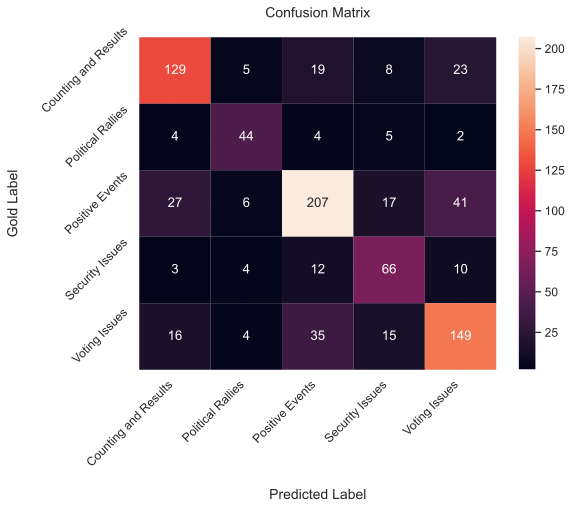

In [1103]:

plot_cm(information_types_test['target'], y_pred, list(new_mapping.keys()))

In [4]:
print(classification_report(information_types_test['target'],
                                y_pred, 
                                target_names=new_mapping.keys()))

NameError: name 'classification_report' is not defined

In [1157]:
# get the number of classes
n_classes = len(information_types["target"].unique())

# classes = [0,1,2,3]
classes   = np.sort(information_types_test["target"].unique())

# relabel the test set
y_true = label_binarize(information_types_test["target"], 
                        classes=classes)

In [1139]:
classes

array([0, 2, 3, 4, 5])

In [1140]:
y_pred_proba

array([[0.14900226, 0.10939091, 0.26988717, 0.33648181, 0.13523786],
       [0.09672917, 0.03390975, 0.44460385, 0.09880192, 0.3259553 ],
       [0.0310454 , 0.02546295, 0.03048882, 0.86993949, 0.04306333],
       ...,
       [0.18116278, 0.0429869 , 0.47611686, 0.134955  , 0.16477845],
       [0.11115173, 0.04102281, 0.26324789, 0.07650147, 0.50807611],
       [0.4455612 , 0.21031126, 0.0902725 , 0.16830761, 0.08554743]])

In [1271]:
y_pred_proba = lr_pipe.predict_proba(information_types_test["clean_text"])


In [1274]:
y_true

array([[0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]])

In [1273]:
y_pred_proba

array([[0.14900226, 0.10939091, 0.26988717, 0.33648181, 0.13523786],
       [0.09672917, 0.03390975, 0.44460385, 0.09880192, 0.3259553 ],
       [0.0310454 , 0.02546295, 0.03048882, 0.86993949, 0.04306333],
       ...,
       [0.18116278, 0.0429869 , 0.47611686, 0.134955  , 0.16477845],
       [0.11115173, 0.04102281, 0.26324789, 0.07650147, 0.50807611],
       [0.4455612 , 0.21031126, 0.0902725 , 0.16830761, 0.08554743]])

In [1174]:
new_mapping.keys()

dict_keys(['Counting and Results', 'Political Rallies', 'Positive Events', 'Security Issues', 'Voting Issues'])

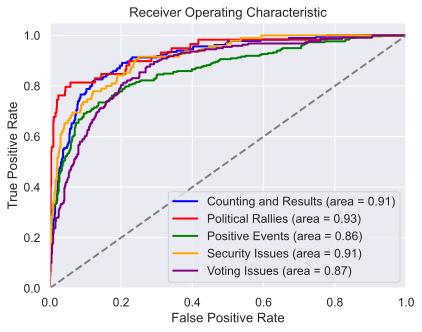

In [1175]:
plot_roc(y_true, y_pred_proba,list(new_mapping.keys()))

In [1133]:
combined_test_data['predicted_target'] = y_pred

ValueError: Length of values (855) does not match length of index (2519)

In [479]:
combined_test_data["predicted_label"] = combined_test_data['predicted_target'].map(idx_to_class)

In [480]:
combined_test_data[(combined_test_data["merged_label"] != combined_test_data["predicted_label"]) & (combined_test_data["merged_label"] == 'Voting Issues')][["text","label", "merged_label","predicted_label"]].sample(20)

text  \
4207                                                                                                                                                                                                              Finger prints not showing so the machine is not showing the person#Cherengany   
3955                                                                                                                                                                                                                There is a network  failure in Kuria East and the machines are not working.   
2846                                                                                                                                                                                                    "Officer dies after poll vehicle rolls #ElectionsKE #KenyaPoll https://t.co/OFASmr1Gs9"   
4408                                                                                                                                                The mess in social hall soweto Embakasi East is too much i have been here for almost 10 hours no progress and the queue is on a stand still   
97283                                                                                                                                                               JUST IN: IEBC has authorized use of manual register in 84 polling stations in Makueni and 154 polling stations in Kakamega.   
7078   .. issue of the IEBC's servers was an important part of the controversy in 2017\n\nThis time round, there is an accusation that UDA has been involved in an "attack on the portal". There are two things to say here. 1) these claims are particularly challenging as it is very hard...   
4557                                                                                                                                                                                                                                         Code 20 Voters assister not taking oath of secrecy   
3323                                                                                                                                                                                                                             KIEMS working with few cases of voters not identified by KIEMs   
56250                                                                                                                        Where is the truth bwana Chebukati, DCI has issued their version of the story who's is talking the truth? Don't burn our country please it's the only home we know   
97206                                                                                                                                          Manual Register being used in more than 100 polling stations over failure of KIEMS Kit - IEBC \n\n#KenyaDecides2022\n#KenyansPoll\n#KenyaDecides   
86098                                                                                                                                                                                                                                                                    I have a  voter issues   
10273                                     UPDATE: An officer of the @IEBCKenya has been caught altering figures on a laptop on the tallying floor at the Bomas of Kenya. Hon. @tjkajwang noticed the act and alerted security personnel who confiscated the laptop that contains vital details.   
767                                                                                                                                                                                                              A candidate in molo is printing papers to give voters to copy at ballot booth.   
94709                                                                                                                                                                                                            

In [481]:
combined_df[["text","label","merged_label"]].to_csv("combined_data.csv")

# Hand crafted features section

### What is the effect of including hand crafted features to the dataset? 

In [153]:
combined_df = pd.read_csv('combined_data.csv', index_col=0)
combined_df.shape

(12595, 3)

In [154]:
combined_df["merged_label"].unique()

array(['Other', 'Positive Events', 'Security Issues', 'Voting Issues',
       'Counting and Results', nan], dtype=object)

In [155]:
combined_df.head()

text  \
631                                                                                             Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.   
634                                                                                                It is important for youths to understand the election and voting processes, their role in the processes and how to ensure that peace is maintained even after elections.   
646                                                                                                                           Voting is just one of the many ways young people can make their voices heard & have an impact on issues that affect them & their communities!   
647                                                                                 Let's all stand out as youth to be agents of change by spreading the message of peace across all the borders within Kenya. Make an impact. There is elections and life after elections.   
653  Quite critical indeed @ItsKimaniThomas\nThe active and meaningful participation of young people in the Kenya General elections #GE2022 requires the precedent of voter education which also translates to an inclusive transparent process for peace in the elections.   

        label merged_label  
631  Opinions        Other  
634  Opinions        Other  
646  Opinions        Other  
647  Opinions        Other  
653  Opinions        Other

In [156]:
# Try using BERT tweet tokenizer for cleaning
!pip3 install nltk emoji==0.6.0
from emoji import demojize
from nltk.tokenize import TweetTokenizer


tokenizer = TweetTokenizer()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [157]:
def normalizeToken(token):
    lowercased_token = token.lower()
    if token.startswith("@"):
        return "@USER"
    elif lowercased_token.startswith("http") or lowercased_token.startswith("www"):
        return "HTTPURL"
    elif len(token) == 1:
        return demojize(token)
    else:
        if token == "’":
            return "'"
        elif token == "…":
            return "..."
        else:
            return token

def normalizeTweet(tweet):
    tokens = tokenizer.tokenize(tweet.replace("’", "'").replace("…", "..."))
    normTweet = " ".join([normalizeToken(token) for token in tokens])

    normTweet = (
        normTweet.replace("cannot ", "can not ")
        .replace("n't ", " n't ")
        .replace("n 't ", " n't ")
        .replace("ca n't", "can't")
        .replace("ai n't", "ain't")
    )
    normTweet = (
        normTweet.replace("'m ", " 'm ")
        .replace("'re ", " 're ")
        .replace("'s ", " 's ")
        .replace("'ll ", " 'll ")
        .replace("'d ", " 'd ")
        .replace("'ve ", " 've ")
    )
    normTweet = (
        normTweet.replace(" p . m .", "  p.m.")
        .replace(" p . m ", " p.m ")
        .replace(" a . m .", " a.m.")
        .replace(" a . m ", " a.m ")
    )

    return " ".join(normTweet.split())

In [158]:
test_samples = list(combined_df['text'].sample(5))
test_samples

['allied results using form 34Bs from IEBC website.. 1st image, 2nd image with total in comment below.\nThese are not official verified results by IEBC.',
 'We are doing very well in Kisii, Nyamira and Kajiado. Continue voting for William Ruto and Rigathi Gachagua.',
 "Hope all the form 34As have been backed up incase iebc tries sth fishy... I don't trust this people",
 'One Kenya one nation',
 'Today Marks the End of "IEBC Camp Meeting"\n\nAll the Choirs and Singing groups present, kindly be assured that you have a chance to']

In [159]:
for ts in test_samples:
    print(normalizeTweet(ts) + "\n")

allied results using form 34Bs from IEBC website .. 1st image , 2nd image with total in comment below . These are not official verified results by IEBC .

We are doing very well in Kisii , Nyamira and Kajiado . Continue voting for William Ruto and Rigathi Gachagua .

Hope all the form 34As have been backed up incase iebc tries sth fishy ... I do n't trust this people

One Kenya one nation

Today Marks the End of " IEBC Camp Meeting " All the Choirs and Singing groups present , kindly be assured that you have a chance to



In [160]:
combined_df['merged_label'].info()

<class 'pandas.core.series.Series'>
Index: 12595 entries, 631 to 7616
Series name: merged_label
Non-Null Count  Dtype 
--------------  ----- 
12593 non-null  object
dtypes: object(1)
memory usage: 196.8+ KB


In [161]:
combined_df = combined_df.dropna(subset=['merged_label'])
print(combined_df.shape)

(12593, 3)


In [162]:
combined_df['merged_label'].unique()

array(['Other', 'Positive Events', 'Security Issues', 'Voting Issues',
       'Counting and Results'], dtype=object)

In [163]:
combined_df['informative_label'] =  combined_df['merged_label'].replace({'Voting Issues':"Informative",'Positive Events':"Informative", "Security Issues":"Informative",
                                                                         "Counting and Results":"Informative", "Positive Events":"Informative","Other":"Non-Informative"})

combined_df['informative_label'].unique()

array(['Non-Informative', 'Informative'], dtype=object)

In [165]:
labeller = LabelEncoder()
combined_df['informative_target'] = labeller.fit_transform(combined_df["informative_label"])
informative_mapping = dict(zip(labeller.classes_, range(len(labeller.classes_))))
print(informative_mapping)

{'Informative': 0, 'Non-Informative': 1}


In [127]:
sentences = combined_df.text.values
labels = combined_df.informative_target.values
informative_labels = combined_df.informative_label.values
merged_labels = combined_df.merged_label.values

In [112]:
from sentence_transformers import SentenceTransformer

In [113]:
embedder = SentenceTransformer('distiluse-base-multilingual-cased')

In [114]:
embeddings = embedder.encode(sentences)
print(embeddings[0])

[ 4.50004414e-02  4.84633967e-02 -4.59679924e-02  5.61052840e-03
  4.92871739e-02  5.34850135e-02 -2.17801356e-03  2.11646911e-02
  1.79923587e-02  1.13756470e-02  3.52466740e-02  2.27691215e-02
 -1.56140313e-01  4.37349081e-02  1.15957335e-02 -3.85495238e-02
  2.28040218e-02  2.13426407e-02  1.97141990e-02 -1.72816142e-02
  1.25389807e-02 -3.19010206e-02  1.59840770e-02  2.48317923e-02
 -1.75665133e-02  4.22152765e-02 -5.79473116e-02  1.56393051e-02
 -2.72286944e-02 -1.31948479e-02  2.01369710e-02 -7.19946772e-02
 -3.74503732e-02 -7.73087814e-02  2.32929047e-02  1.77029781e-02
 -2.79993727e-03  4.05491814e-02  5.18230349e-02  1.10392869e-02
 -9.61394608e-03 -4.27457988e-02  5.24153337e-02  9.84449536e-02
 -2.03259178e-02  4.81274165e-02 -2.37275138e-02  2.05614157e-02
  4.94323894e-02  4.66119833e-02  2.29222067e-02 -6.34894595e-02
  3.28416973e-02 -3.98847274e-02 -1.78016778e-02 -7.92315826e-02
  1.91089530e-02  6.61555603e-02 -1.85282826e-02  5.46894735e-03
 -5.26435785e-02 -6.82530

In [116]:
print(f"The length of the embeddings is {len(embeddings[0])}")

The length of the embeddings is 512


In [117]:
# Plot a tsne to get a visual depiction of the two
# Add specific imports for tsne 
from sklearn.manifold import TSNE

In [125]:
# Apply t-SNE to reduce the dimensionality of embeddings to 2
tsne = TSNE(n_components=2, random_state=42,  perplexity=5, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings)

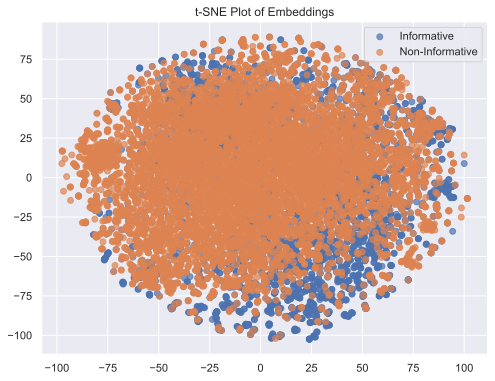

In [132]:
# Create a scatter plot of the t-SNE embeddings
plt.figure(figsize=(8, 6))
for label in np.unique(informative_labels):
    indices = np.where(informative_labels == label)
    plt.scatter(
        embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=str(label), alpha=0.7
    )
plt.title("t-SNE Plot of Embeddings")
plt.legend()
plt.show()

In [135]:
# Multi-label TSNE visualisation

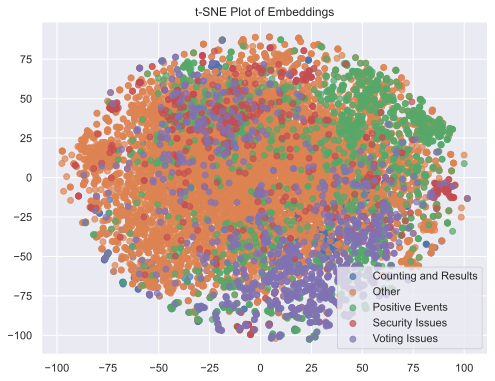

In [145]:
# Create a scatter plot of the t-SNE embeddings
plt.figure(figsize=(8, 6))
for label in np.unique(merged_labels):
    indices = np.where(merged_labels == label)
    plt.scatter(
        embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=str(label), alpha=0.7
    )
plt.title("t-SNE Plot of Embeddings")
plt.legend()
plt.show()

In [149]:
print(len(sentences), len(labels))

12593 12593


In [167]:
# Split the data to train and test
features_train, features_test, informative_labels_train, informative_labels_test = train_test_split(embeddings, 
                                                                            labels, 
                                                                            test_size=0.20, 
                                                                            random_state=0)

In [193]:
from sklearn.svm import SVC

In [203]:
lsvc_pipe  = Pipeline([('model',  LinearSVC(class_weight='balanced',
                                            random_state=50,C=0.01))])

model = lsvc_pipe.fit(features_train, 
                     informative_labels_train)

pred  = model.predict(features_test)
print("Model evaluation on test data")
print(classification_report(informative_labels_test,
                            pred, 
                            target_names=informative_mapping))

Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.60      0.77      0.67       814
Non-Informative       0.87      0.76      0.81      1705

       accuracy                           0.76      2519
      macro avg       0.73      0.76      0.74      2519
   weighted avg       0.78      0.76      0.76      2519



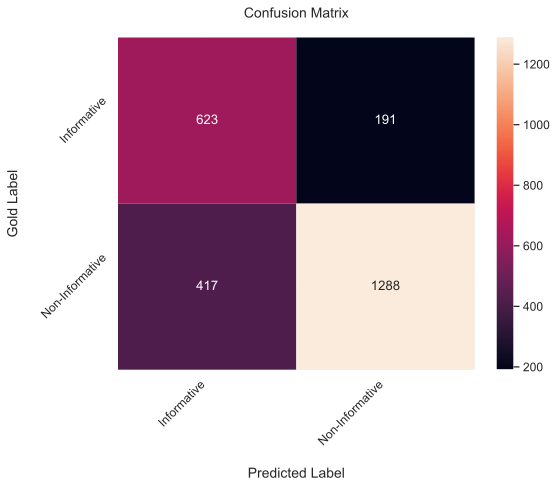

In [204]:
y_pred_informative = lsvc_pipe.predict(features_test)
plot_cm(informative_labels_test, y_pred_informative, list(informative_mapping.keys()))

In [179]:
lr_pipe  = Pipeline([
                    #  ('vect',    CountVectorizer()),
                    #  ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   LogisticRegression())])

model = lr_pipe.fit(features_train, 
                     informative_labels_train)

pred  = model.predict(features_test)

print("Model evaluation on test data")
print(classification_report(informative_labels_test,
                            pred, 
                            target_names=informative_mapping))

Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.62      0.76      0.68       814
Non-Informative       0.87      0.77      0.82      1705

       accuracy                           0.77      2519
      macro avg       0.74      0.77      0.75      2519
   weighted avg       0.79      0.77      0.77      2519



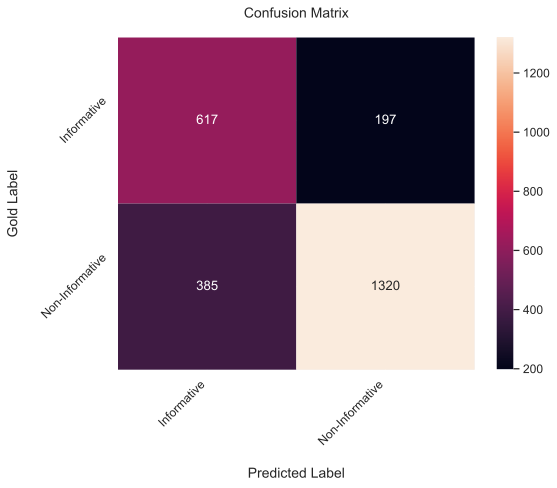

In [180]:
y_pred_informative = lr_pipe.predict(features_test)
plot_cm(informative_labels_test, y_pred_informative, list(informative_mapping.keys()))

In [185]:
rf_pipe  = Pipeline([
                    #  ('vect',    CountVectorizer()),
                    #  ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   RandomForestClassifier(n_estimators=200))])

model = rf_pipe.fit(features_train, 
                     informative_labels_train)

pred  = model.predict(features_test)

print("Model evaluation on test data")
print(classification_report(informative_labels_test,
                            pred, 
                            target_names=informative_mapping))

Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.75      0.54      0.63       814
Non-Informative       0.81      0.92      0.86      1705

       accuracy                           0.79      2519
      macro avg       0.78      0.73      0.74      2519
   weighted avg       0.79      0.79      0.78      2519



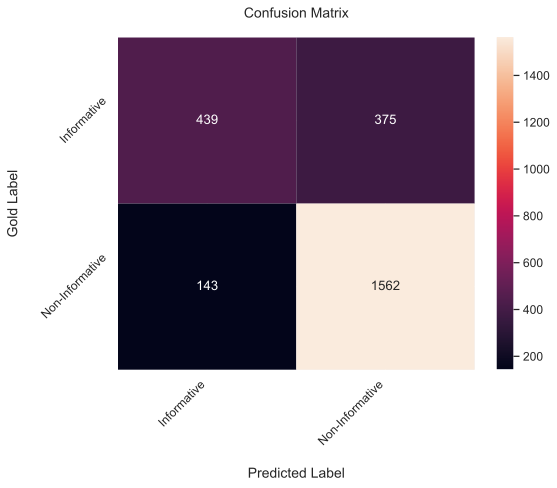

In [186]:
y_pred_informative = rf_pipe.predict(features_test)
plot_cm(informative_labels_test, y_pred_informative, list(informative_mapping.keys()))

In [187]:
import xgboost as xgb

In [191]:
xgb_pipe  = Pipeline([
                    #  ('vect',    CountVectorizer()),
                    #  ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   xgb.XGBClassifier(n_estimators=500))])

model = xgb_pipe.fit(features_train, 
                     informative_labels_train)

pred  = model.predict(features_test)

print("Model evaluation on test data")
print(classification_report(informative_labels_test,
                            pred, 
                            target_names=informative_mapping))

Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.73      0.62      0.67       814
Non-Informative       0.83      0.89      0.86      1705

       accuracy                           0.80      2519
      macro avg       0.78      0.76      0.76      2519
   weighted avg       0.80      0.80      0.80      2519



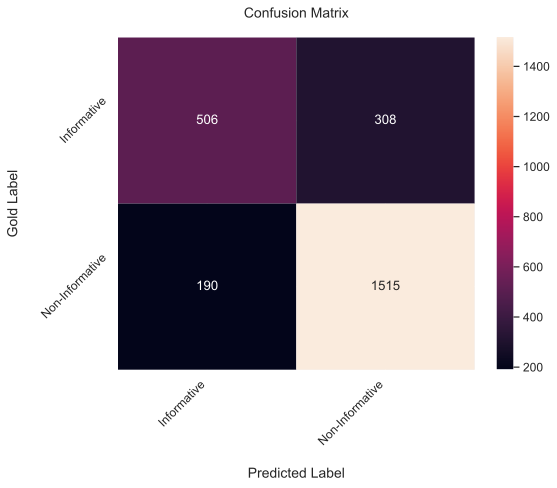

In [192]:
y_pred_informative = xgb_pipe.predict(features_test)
plot_cm(informative_labels_test, y_pred_informative, list(informative_mapping.keys()))

In [ ]:
# It would be interesting to visualise or to do a tsne plot of informative vs informative - to visualise it - then start experimenting on different methods
# Split the data into training and test sets for the first run - code to split the data
# Start with the baseline model - get the best performing model, then experiment with the handcrafted features and see how it performs 
# Train the first baseline - what models - logistic regression, svc, one tree based, multinomial nb, random forests maybe - decision tree classifier
# Then progressively add linguistic driven features 
# Temporal information - distance from election - absolute value - could be like 10 or something, one hot encoding of the time maybe? 
# Linguistic driven features - sentiment possibly - positive, negative or neutral, compound scoree
# Number of NER - could be useful for informtive - they often tend to mention locations - informative tweet


In [88]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS

import spacy as sp
nlp = sp.load("en_core_web_sm")

import nltk
nltk.download('vader_lexicon')
sentiment_analyzer = VS()

nltk.download("stopwords")
from nltk.corpus import stopwords
enStop = stopwords.words('english')
enStop_dict={e: 0 for e in enStop}

from nltk.stem.porter import *
stemmer = PorterStemmer()

# load oov dictionary for word correction
oov_dict={}
with open("OOV_Dictionary_V1.0.tsv","r",encoding="latin-1") as f:
    for line in f:
        oov_dict[line.split()[0]]=line.strip().split()[1]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jabez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jabez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1036]:
# Load actionable verbs
def load_actionable_verbs(df, important_list={'Political Rallies':0,'Positive Events':0,'Security Issues':0,'Voting Issues':0,'Counting and Results':0}): 
    actionnable_verb_list_dict={}
    for index,row in df.iterrows():
        tweet_text=row['text']
        category=row['merged_label']
        if category in important_list:
            if category not in actionnable_verb_list_dict:
                actionnable_verb_list_dict[category]=[]
            doc=nlp(tweet_text)
            verbs=[token.text for token in doc if token.pos_ == "VERB"]
            for v in verbs:
                if len(v)>=3 and v not in enStop_dict:
                    actionnable_verb_list_dict[category].append(v)
    return {e:sorted(nltk.FreqDist(actionnable_verb_list_dict[e]).items(), key=lambda kv: kv[1],reverse=True) for e in actionnable_verb_list_dict}

In [1037]:
%time sorted_actionnable_verb_dict = load_actionable_verbs(df=combined_df)

CPU times: user 33.2 s, sys: 792 ms, total: 34 s
Wall time: 35.9 s


In [1038]:
sorted_actionnable_verb_dict2dict_top10={}
for event in sorted_actionnable_verb_dict:
    sorted_actionnable_verb_dict2dict_top10[event]={}
    for tup in sorted_actionnable_verb_dict[event][:10]:
        sorted_actionnable_verb_dict2dict_top10[event][stemmer.stem(tup[0])]=tup[1]
sorted_actionnable_verb_dict2dict_top10.keys()

dict_keys(['Political Rallies', 'Positive Events', 'Security Issues', 'Voting Issues', 'Counting and Results'])

In [1039]:
print(sorted_actionnable_verb_dict['Positive Events'][:10])
print(sorted_actionnable_verb_dict['Political Rallies'][:10])
print(sorted_actionnable_verb_dict['Security Issues'][:10])
print(sorted_actionnable_verb_dict['Voting Issues'][:10])
print(sorted_actionnable_verb_dict['Counting and Results'][:10])

[('vote', 71), ('Let', 69), ('going', 38), ('voting', 37), ('let', 35), ('ensure', 34), ('maintain', 33), ('need', 27), ('Presiding', 27), ('tallying', 26)]
[('vote', 29), ('led', 23), ('promised', 20), ('addressed', 18), ('urged', 16), ('said', 15), ('elected', 15), ('held', 13), ('support', 12), ('claimed', 12)]
[('shot', 19), ('acting', 18), ('said', 17), ('found', 16), ('tallying', 15), ('arrested', 14), ('killed', 13), ('reported', 12), ('injured', 11), ('heard', 10)]
[('vote', 80), ('missing', 68), ('found', 32), ('voting', 31), ('register', 29), ('voted', 28), ('turn', 26), ('registered', 25), ('working', 25), ('marked', 23)]
[('tallying', 52), ('tallied', 31), ('cast', 26), ('uploaded', 23), ('counted', 22), ('announce', 22), ('leading', 22), ('rejected', 21), ('casted', 20), ('KenyaDecides2022', 19)]


In [1040]:
import pickle

In [1041]:
vectors_path = 'fasttext_vectors.p' # Change this to the relative path on your machine

with open(vectors_path, 'rb') as f:
    vectors = pickle.load(f)

In [1042]:
stopList = ["http", "https", "rt", "@", ":", "t.co", "co", "amp", "&amp;", "...", "\n", "\r"]
stopList.extend(string.punctuation)

local_tokenizer = TweetTokenizer()
def tokenizer_wrapper(text):
    return local_tokenizer.tokenize(text)

def normalize(s):
        """
        Given a text, cleans and normalizes it. Feel free to add your own stuff.
        From: https://www.kaggle.com/mschumacher/using-fasttext-models-for-robust-embeddings
        """
        s = s.lower()
        # Replace numbers and symbols with language
        s = s.replace('&', ' and ')
        s = s.replace('@', ' at ')
        s = s.replace('0', 'zero')
        s = s.replace('1', 'one')
        s = s.replace('2', 'two')
        s = s.replace('3', 'three')
        s = s.replace('4', 'four')
        s = s.replace('5', 'five')
        s = s.replace('6', 'six')
        s = s.replace('7', 'seven')
        s = s.replace('8', 'eight')
        s = s.replace('9', 'nine')
        return s

def tokenize_tweet(string):
    string=string.lower()
    # Clean and Refine (remove URL, special characters)
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    string = re.sub(giant_url_regex, "", string)
    
    string = re.sub(r"\'s", "s", string)
    string = re.sub(r"\'ve", "ve", string)
    string = re.sub(r"\'t", "t", string)
    string = re.sub(r"\'re", "re", string)
    string = re.sub(r"\'d", "d", string)
    string = re.sub(r"\'ll", "ll", string)
    
    #Skip retweet signs, @ symbols, and special chars such as punctuations
    string = re.sub(r"[^A-Za-z]", " ", string)
    string = re.sub(r"\s{2,}", " ", string)
    tokens=[]
    for w in string.split():
        # OOV Correction
        if w in oov_dict:
            w=oov_dict[w]
        # Short words skip and Stop word removal
        if len(w) >= 3 and w not in enStop_dict:
            tokens.append(w)
    return tokens

def vectorize(sentence):
    tokenized = tokenize_tweet(sentence)
    wvs = []
    for t in tokenized:
        if t in vectors.keys():
            v = vectors[t]
            norm = np.linalg.norm(v)
            normed_v = v / norm
            wvs.append(normed_v) 
    m = np.array(wvs)
    normed_m = np.mean(m, axis=0)
    return normed_m

# construct X matrix
def to_matrix(raw_tweet_texts):
    X_matrix = np.zeros((len(raw_tweet_texts), 300))
    for index,s in enumerate(raw_tweet_texts):
        sv = vectorize(s)
        if not np.isnan(sv).any():
            X_matrix[index,:]=sv
        else:
            print(index,s)
    return X_matrix

In [1043]:
def getReportsByLabel(label= 'Security Issues', df = combined_df):
        return df[df.label == 'Security Issues'].sample(1)['text'].item()

In [1044]:
test = getReportsByLabel()
test

'HAPPENING NOW: Security agents raid an office on Transnational Bank House (along City Hall Way) believed to be the nerve centre of the UDA-IEBC-Venezuela gang. Several Computers carted away.'

In [1045]:
doc = nlp(test)

In [1046]:
# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])
# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

print(doc.ents)

Noun phrases: ['Security agents', 'an office', 'Transnational Bank House', 'City Hall Way', 'the nerve centre', 'the UDA-IEBC-Venezuela gang', 'Several Computers']
Verbs: ['happen', 'raid', 'believe', 'cart']
Transnational Bank House ORG
City Hall Way FAC
Venezuela GPE
(Transnational Bank House, City Hall Way, Venezuela)


In [1047]:
"""
Features considered for boosting are as follows:
1. No. of hashtags (numeric)
2. No. of special verbs, such as, trapped, stuck, move etc (dataset statistical analysis)
3. Sentiment polarity (categorical,, -1, 0 or 1)
4. Tweet length (word_length, char_length, numeric)
5. URL count (numeric)
6. Digit count (int, numeric)
7. Retweet check (0 or 1)
8. caps ratio (float, numeric)
9. Special chars count (@, ! and ?, normalized float numeric)
10. : in first token check (0 or 1)
11. Named Entity count (numeric)
"""
def return_features(tweet_text):
    #1. No. of hashtags (numeric)
    hashtag_count=tweet_text.count("#")
    #3. Sentiment polarity (categorical,, -1, 0 or 1)
    sentiment = sentiment_analyzer.polarity_scores(tweet_text)
    sentiment_cpd=sentiment['compound']
    sentiment_neg=sentiment['neg']
    sentiment_neu=sentiment['neu']
    sentiment_pos=sentiment['pos']
  
    #2. No. of special verbs such as, trapped, stuck, move etc (dataset statistical analysis)
    #['MovePeople', 'EmergingThreats', 'GoodsServices', 'SearchAndRescue', 'ServiceAvailable']
    tokens=tokenize_tweet(tweet_text)
    is_action1=int(any(stemmer.stem(i) in sorted_actionnable_verb_dict2dict_top10['Political Rallies'] for i in tokens))
    is_action2=int(any(stemmer.stem(i) in sorted_actionnable_verb_dict2dict_top10['Security Issues'] for i in tokens))
    is_action3=int(any(stemmer.stem(i) in sorted_actionnable_verb_dict2dict_top10['Voting Issues'] for i in tokens))
    is_action4=int(any(stemmer.stem(i) in sorted_actionnable_verb_dict2dict_top10['Counting and Results'] for i in tokens))
    is_action5=int(any(stemmer.stem(i) in sorted_actionnable_verb_dict2dict_top10['Positive Events'] for i in tokens))

    #4. Tweet length (word_length, char_length, numeric)
    tokens=tweet_text.split(" ")
    word_length=len(tokens)
    char_length=len(tweet_text)
    
    #5. URL count (numeric)
    url_count=len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',tweet_text))
    #6. Digit count (int, numeric)
    digital_count=len( re.findall('[0-9]+', tweet_text))
    
    #7. Retweet check (0 or 1)
    is_retweet=int(tweet_text[:2]=="RT")
    # 8. caps ratio (float, numeric)
    caps_ratio=len("".join(re.findall('[A-Z]+', tweet_text)))/char_length
    
    #9. Special chars count
    at_count=tweet_text.count("@")
    exclaim_count=tweet_text.count("!")
    question_count=tweet_text.count("?")
    
    #10. : in first token check (0 or 1)
    colon_check=int(":" in tokens[0])
    #11. Named Entity count (numeric)
    doc = nlp(tweet_text)
    ner_count=len(doc.ents)
#     print(doc.ents)
    
    return_list=[hashtag_count,sentiment_cpd,sentiment_neg,sentiment_neu,sentiment_pos,is_action1,
                    is_action2,is_action3,is_action4,is_action5,word_length,char_length,
                    url_count,digital_count,is_retweet,caps_ratio,at_count,exclaim_count,question_count,
                    colon_check,ner_count]
    return return_list

def normalize_by_columns(crafted_features_matrix,columns_to_normalize=["hashtag_count","word_length","char_length","url_count","digital_count","at_count","exclaim_count","question_count","ner_count"]):
    crafted_features_matrix_=crafted_features_matrix.copy()
    to_normalize_features_matrix=crafted_features_matrix_[columns_to_normalize]
    from sklearn import preprocessing
    x = to_normalize_features_matrix.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalized_features_matrix = pd.DataFrame(x_scaled,columns=columns_to_normalize)
    normalized_features_matrix.head()
    for column in columns_to_normalize:
        crafted_features_matrix_[column]=normalized_features_matrix[column]
    return crafted_features_matrix_

In [1048]:
test_report=getReportsByLabel()
print("test for ",test_report)
feature_names=["hashtag_count","sentiment_cpd","sentiment_neg","sentiment_neu",
               "sentiment_pos","is_action1","is_action2","is_action3","is_action4",
               "is_action5","word_length","char_length","url_count","digital_count",
              "is_retweet","caps_ratio","at_count","exclaim_count","question_count",
              "colon_check","ner_count"]
import datetime
start_time=datetime.datetime.now()
features=return_features(test_report)

for idx,fature_name in enumerate(feature_names):
    print(fature_name,"====>",features[idx])

test for  Chebukati is playing with fire!!!
hashtag_count ====> 0
sentiment_cpd ====> -0.3561
sentiment_neg ====> 0.406
sentiment_neu ====> 0.371
sentiment_pos ====> 0.223
is_action1 ====> 0
is_action2 ====> 0
is_action3 ====> 0
is_action4 ====> 0
is_action5 ====> 0
word_length ====> 5
char_length ====> 33
url_count ====> 0
digital_count ====> 0
is_retweet ====> 0
caps_ratio ====> 0.030303030303030304
at_count ====> 0
exclaim_count ====> 3
question_count ====> 0
colon_check ====> 0
ner_count ====> 1


In [1049]:
combined_df.head(4)

text  \
631              Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.   
634                 It is important for youths to understand the election and voting processes, their role in the processes and how to ensure that peace is maintained even after elections.   
646                                            Voting is just one of the many ways young people can make their voices heard & have an impact on issues that affect them & their communities!   
647  Let's all stand out as youth to be agents of change by spreading the message of peace across all the borders within Kenya. Make an impact. There is elections and life after elections.   

                                                                                                                 clean_text  \
631                 elections coming youths turn vote preach peace elections never used divided selfish political interests   
634             important youths understand election voting processes role processes ensure peace maintained even elections   
646                                    voting one many ways young people make voices heard impact issues affect communities   
647  let stand youth agents change spreading message peace across borders within kenya make impact elections life elections   

    merged_label     label informative_label  
631        Other  Opinions   Non-Informative  
634        Other  Opinions   Non-Informative  
646        Other  Opinions   Non-Informative  
647        Other  Opinions   Non-Informative

In [1052]:
feature_names=["hashtag_count","sentiment_cpd","sentiment_neg","sentiment_neu",
               "sentiment_pos","is_action1","is_action2","is_action3","is_action4","is_action5",
               "word_length","char_length","url_count","digital_count",
              "is_retweet","caps_ratio","at_count","exclaim_count","question_count",
              "colon_check","ner_count","label","informative_label"]

crafted_features_matrix=pd.DataFrame(columns=feature_names)
texts=combined_df['text'].to_numpy()
labels=combined_df['label'].to_numpy()
merged_labels=combined_df['merged_label'].to_numpy()
informative_labels =  combined_df['informative_label'].to_numpy()
for index,text in enumerate(texts):
    if index%1000==0:
        print("Now is processing at index",index)
    features=return_features(text)
    features.append(merged_labels[index])
    features.append(informative_labels[index])
    crafted_features_matrix.loc[len(crafted_features_matrix)]=features

Now is processing at index 0
Now is processing at index 1000
Now is processing at index 2000
Now is processing at index 3000
Now is processing at index 4000
Now is processing at index 5000
Now is processing at index 6000
Now is processing at index 7000
Now is processing at index 8000
Now is processing at index 9000
Now is processing at index 10000
Now is processing at index 11000
Now is processing at index 12000


In [1053]:
new_crafted_features_matrix=normalize_by_columns(crafted_features_matrix)
print(new_crafted_features_matrix.shape)
new_crafted_features_matrix.head()

(12594, 23)


hashtag_count  sentiment_cpd  sentiment_neg  sentiment_neu  sentiment_pos  \
0       0.000000         0.3400          0.095          0.736          0.169   
1       0.000000         0.7845          0.000          0.760          0.240   
2       0.000000         0.0000          0.000          1.000          0.000   
3       0.000000         0.5423          0.000          0.901          0.099   
4       0.047619         0.7102          0.059          0.748          0.193   

   is_action1  is_action2  is_action3  is_action4  is_action5  ...  \
0           1           0           1           0           1  ...   
1           1           0           1           0           1  ...   
2           1           1           1           0           1  ...   
3           1           0           0           0           1  ...   
4           1           0           0           0           0  ...   

   digital_count  is_retweet  caps_ratio  at_count  exclaim_count  \
0       0.000000           0    0.040936  0.000000       0.000000   
1       0.000000           0    0.005952  0.000000       0.000000   
2       0.000000           0    0.007092  0.000000       0.111111   
3       0.000000           0    0.021858  0.000000       0.000000   
4       0.033333           0    0.034483  0.055556       0.000000   

   question_count  colon_check  ner_count  label  informative_label  
0             0.0            0   0.068966  Other    Non-Informative  
1             0.0            0   0.000000  Other    Non-Informative  
2             0.0            0   0.000000  Other    Non-Informative  
3             0.0            0   0.034483  Other    Non-Informative  
4             0.0            0   0.068966  Other    Non-Informative  

[5 rows x 23 columns]

In [1054]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [1055]:
# Create an instance of the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the documents and transform the text to the term frequency (TF) matrix
tfidf_matrix = vectorizer.fit_transform(combined_df["clean_text"])
# Print the TF-IDF matrix
tfidf_matrix = tfidf_matrix.toarray()

In [1056]:
tfidf_matrix.shape

(12594, 18451)

In [1255]:
combined_matrix=np.concatenate([tfidf_matrix, new_crafted_features_matrix[["hashtag_count","sentiment_cpd","sentiment_neg","sentiment_neu",
               "sentiment_pos","is_action1","is_action2","is_action3","is_action4","is_action5",
               "word_length","char_length","url_count","digital_count",
              "is_retweet","caps_ratio","at_count","exclaim_count","question_count",
              "colon_check","ner_count"]].values], axis=1)

#X and y construction for priortiy classification
X_crafted_matrix=combined_matrix
print(X_crafted_matrix.shape)

(12594, 18472)


In [1256]:
y_crafted_label=new_crafted_features_matrix['label'].values
print(y_crafted_label.shape)
print(y_crafted_label)

(12594,)
['Other' 'Other' 'Other' ... 'Voting Issues' 'Counting and Results'
 'Counting and Results']


In [1257]:
y_crafted_informative_label=new_crafted_features_matrix['informative_label'].values
print(y_crafted_informative_label.shape)
print(y_crafted_informative_label)

(12594,)
['Non-Informative' 'Non-Informative' 'Non-Informative' ... 'Informative'
 'Informative' 'Informative']


In [1258]:
features_train, features_test, informative_labels_train, informative_labels_test = train_test_split(X_crafted_matrix, 
                                                                            y_crafted_informative_label, 
                                                                            test_size=0.20, 
                                                                            random_state=0)

In [1259]:
labeler = LabelEncoder()
labels_train = labeler.fit_transform(informative_labels_train)
labels_test = labeler.transform(informative_labels_test)

In [1260]:
lsvc_pipe  = Pipeline([
                    #  ('vect',    CountVectorizer()),
                    #  ('tfidf',   TfidfTransformer()),
                    #  ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                      ('model',  LinearSVC(class_weight='balanced',
                                            random_state=50,C=0.1))])

model = lsvc_pipe.fit(features_train, 
                     labels_train)

pred  = model.predict(features_test)
print("Model evaluation on test data")
print(classification_report(labels_test,
                            pred, 
                            target_names=informative_mapping))

Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.60      0.68      0.64       855
Non-Informative       0.82      0.77      0.79      1664

       accuracy                           0.74      2519
      macro avg       0.71      0.72      0.71      2519
   weighted avg       0.75      0.74      0.74      2519



In [1261]:
labels_train.shape

(10075,)

In [1262]:
np.unique(labels_train,return_counts=True)

(array([0, 1]), array([3602, 6473]))

In [1263]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(sampling_strategy='not majority')
features_train,labels_train=oversampler.fit_resample(features_train,labels_train)
print(features_train.shape)
print(len(labels_train.shape))

(12946, 18472)
1


In [1264]:
rf_pipe  = Pipeline([
                    #  ('vect',    CountVectorizer()),
                    #  ('tfidf',   TfidfTransformer()),
                    #  ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   RandomForestClassifier())])

model = rf_pipe.fit(features_train, 
                     labels_train)

pred  = model.predict(features_test)

print("Model evaluation on test data")
print(classification_report(labels_test,
                            pred, 
                            target_names=informative_mapping))

Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.74      0.56      0.64       855
Non-Informative       0.80      0.90      0.85      1664

       accuracy                           0.78      2519
      macro avg       0.77      0.73      0.74      2519
   weighted avg       0.78      0.78      0.78      2519



In [1265]:
nb_pipe  = Pipeline([
                    #  ('vect',    CountVectorizer()),
                    #  ('tfidf',   TfidfTransformer()),
                    #  ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   LogisticRegression(C=1000))])

model = nb_pipe.fit(features_train, 
                     labels_train)

pred  = model.predict(features_test)

print("Model evaluation on test data")
print(classification_report(labels_test,
                            pred, 
                            target_names=informative_mapping))

Model evaluation on test data
                 precision    recall  f1-score   support

    Informative       0.56      0.61      0.59       855
Non-Informative       0.79      0.76      0.77      1664

       accuracy                           0.71      2519
      macro avg       0.68      0.68      0.68      2519
   weighted avg       0.71      0.71      0.71      2519



/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


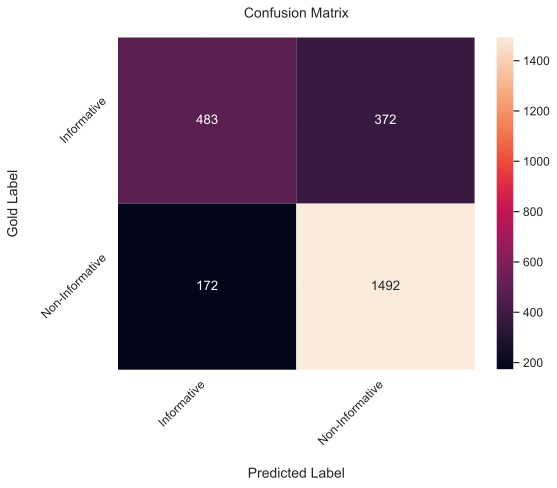

In [1267]:
y_pred_informative = rf_pipe.predict(features_test)
plot_cm(labels_test, y_pred_informative, list(informative_mapping.keys()))

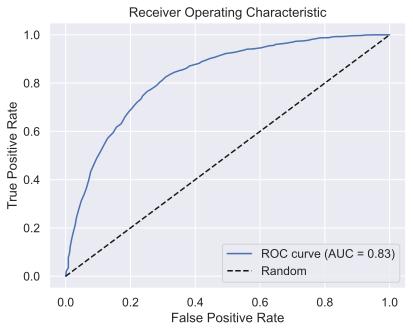

In [1268]:
# Compute the false positive rate, true positive rate, and threshold values
y_test = labels_test
y_pred_prob = rf_pipe.predict_proba(features_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve
auc_sc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_sc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [1270]:
y_pred_prob[0]

0.84

In [623]:
features_train, features_test, labels_train, labels_test = train_test_split(X_crafted_matrix, 
                                                                            y_crafted_label, 
                                                                            test_size=0.20, 
                                                                            random_state=0)

In [624]:
labeler = LabelEncoder()
labels_train = labeler.fit_transform(labels_train)
labels_test = labeler.transform(labels_test)

In [1070]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(sampling_strategy='not majority')
features_train,informative_labels_train=oversampler.fit_resample(features_train,informative_labels_train)
print(features_train.shape)
print(len(informative_labels_train.shape))

ValueError: Found input variables with inconsistent numbers of samples: [12946, 10075]

In [1069]:
nb_pipe  = Pipeline([
                    #  ('vect',    CountVectorizer()),
                    #  ('tfidf',   TfidfTransformer()),
                    #  ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   MultinomialNB())])

model = nb_pipe.fit(features_train, 
                     informative_labels_train)

pred  = model.predict(features_test)

print("Model evaluation on test data")
print(classification_report(informative_labels_test,
                            pred, 
                            target_names=mapping))

ValueError: Found input variables with inconsistent numbers of samples: [12946, 10075]

In [627]:
# lr_pipe  = Pipeline([
#                     #  ('vect',    CountVectorizer()),
#                     #  ('tfidf',   TfidfTransformer()),
#                     #  ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
#                      ('model',   LogisticRegression(max_iter=1000))])

# model = lr_pipe.fit(features_train, 
#                      labels_train)

# pred  = model.predict(features_test)

# print("Model evaluation on test data")
# print(classification_report(labels_test,
#                             pred, 
#                             target_names=mapping))

In [628]:
lsvc_pipe  = Pipeline([
                     ('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                      ('model',  LinearSVC(class_weight='balanced',
                                            random_state=50,C=0.1))])

model = lsvc_pipe.fit(features_train, 
                     labels_train)

pred  = model.predict(features_test)
print("Model evaluation on test data")
print(classification_report(labels_test,
                            pred, 
                            target_names=mapping))

Model evaluation on test data
                      precision    recall  f1-score   support

Counting and Results       0.31      0.43      0.36       184
               Other       0.83      0.70      0.76      1664
   Political Rallies       0.44      0.56      0.49        59
     Positive Events       0.37      0.48      0.42       298
     Security Issues       0.42      0.47      0.44        95
       Voting Issues       0.44      0.56      0.49       219

            accuracy                           0.63      2519
           macro avg       0.47      0.53      0.49      2519
        weighted avg       0.68      0.63      0.65      2519



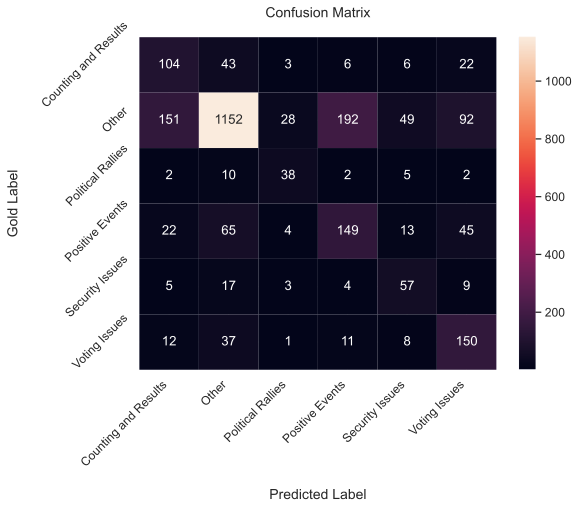

In [629]:
y_pred = nb_pipe.predict(features_test)
plot_cm(labels_test, y_pred, list(mapping.keys()))

In [630]:
# get the number of classes
n_classes = len(np.unique(labels_train))

# classes = [0,1,2,3]
classes   = np.sort(np.unique(labels_train))

# relabel the test set
y_true = label_binarize(labels_test, 
                        classes=classes)

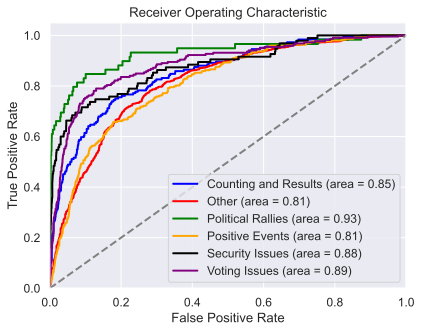

In [631]:
y_pred_proba = nb_pipe.predict_proba(features_test)
plot_roc(y_true, y_pred_proba,idx_to_class)

In [2]:
import argilla as rg

In [6]:
import os
import argilla as rg

rg.init(
    api_url="http://localhost:6900/",
    api_key="admin.apikey",
    workspace="admin",
    extra_headers={"X-Argilla-Workspace": "my_connection_headers"}
)

In [7]:
# Create a basic text classification record
record = rg.TextClassificationRecord(
    text="Hello world, this is me!",
    prediction=[("LABEL1", 0.8), ("LABEL2", 0.2)],
    annotation="LABEL1",
    multi_label=False,
)

In [8]:
# Upload (log) the record to the Argilla web app
rg.log(record, "my_first_record")

Output()

1 records logged to ]8;id=73857;http://localhost:6900/datasets/admin/my_first_record\http://localhost:6900/datasets/admin/my_first_record]8;;\

BulkResponse(dataset='my_first_record', processed=1, failed=0)

In [12]:
import pandas as pd

In [13]:
# Load the dataset
ushahidi_df = pd.read_csv("data/ushahidi.csv")
ushahidi_df.shape

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_65363/561396766.py:2: DtypeWarning: Columns (4,8,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,37,38,39,40,41,42,44,45,46,47,49,50,51,52,53,54,55,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,77,78,79,80,81,82,83,84,85,86,87,89,90,91,92,93,94,95,98,99,100,101,102,103,104,105,106,107,108,110,111,112,113,114,115,116,119,120,121,123,124,125,126,128,129,131,132,133,134,135,136,137,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,161,162,163,164,165,166,167,168,169,170,172,173,175,176,177,178,179,182,183,184,185,186,187,188,189,190,192,193,194,195,196,197,200,201,202,203,204,206,207,208,209,212,213,214,215,218,219,220,221,222,223,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,244,245,246,251,255,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  ushahidi_df = pd.read_csv("data/ushahidi.csv")


(102387, 260)

In [14]:
# Drop all columns that are fully null
print(f"Before dropping columns that are null : {ushahidi_df.shape}")
ushahidi_df = ushahidi_df.dropna(axis=1, how='all')
print(f"After dropping columns that are null : {ushahidi_df.shape}")
# Dropped 16 columns from the data set

Before dropping columns that are null : (102387, 260)
After dropping columns that are null : (102387, 244)
